In [2]:
#import every library out there
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [3]:
data = pd.read_csv('cpuspec2017_data.csv')
data

test_series                        iteration_guid  \
0      SPECrate2017_fp                                   NaN   
1      SPECrate2017_fp                                   NaN   
2      SPECrate2017_fp                                   NaN   
3      SPECrate2017_fp                                   NaN   
4      SPECrate2017_fp                                   NaN   
...                ...                                   ...   
20621  SPECrate2017_fp  fa61de41-e491-4099-8b48-1c6b0ab91033   
20622  SPECrate2017_fp  fc75beac-9317-42a6-a2b7-cafeda5b5edb   
20623  SPECrate2017_fp  fc976b49-d799-479f-a93f-76273da37e1b   
20624  SPECrate2017_fp  fd724028-b03f-4805-a2bb-37c1f727795b   
20625  SPECrate2017_fp  ffaef674-ea4b-4901-9385-d890d0b2905f   

                    bmc_name bmc_version  dimm_slots_total  \
0                    unknown         NaN               NaN   
1                    unknown         NaN               NaN   
2                    unknown         NaN               NaN   
3                    unknown         NaN               NaN   
4                    unknown         NaN               NaN   
...                      ...         ...               ...   
20621       quartz-7574.sppo        2.17              24.0   
20622    huambo-37dc.amd.com        2.17              12.0   
20623       quartz-6535.sppo        2.17              24.0   
20624   ethanolxf297.amd.com        3.14               6.0   
20625  cinnabar-3149.amd.com        2.17              12.0   

       dimm_slots_populated  memory_channels_total  memory_channels_populated  \
0                       NaN                    NaN                        NaN   
1                       NaN                    NaN                        NaN   
2                       NaN                    NaN                        NaN   
3                       NaN                    NaN                        NaN   
4                       NaN                    NaN                        NaN   
...                     ...                    ...                        ...   
20621                  24.0                   24.0                       24.0   
20622                  12.0                   12.0                       12.0   
20623                  24.0                   24.0                       24.0   
20624                   6.0                    6.0                        6.0   
20625                   6.0                    6.0                        6.0   

       dimms_per_channel socket0_name  ...  \
0                    NaN           P0  ...   
1                    NaN           P0  ...   
2                    NaN           P0  ...   
3                    NaN           P0  ...   
4                    NaN           P0  ...   
...                  ...          ...  ...   
20621                1.0           P0  ...   
20622                1.0           P0  ...   
20623                1.0           P0  ...   
20624                1.0           P0  ...   
20625                1.0           P0  ...   

                                                sut_name   submitter_name  \
0      from-2017-sub/res2018q1/appr20180227/cpu2017-2...  xiangjunjie (A)   
1      from-2017-rsf/res2018q1/appr20180227/cpu2017-2...  xiangjunjie (A)   
2      from-2017-sub/res2018q3/appr20180710/cpu2017-2...  xiangjunjie (A)   
3      from-2017-sub/res2018q3/appr20180727/cpu2017-2...  xiangjunjie (A)   
4      from-2017-rsf/res2018q4/appr20181030/cpu2017-2...  xiangjunjie (A)   
...                                                  ...              ...   
20621                                   sppo-quartz-7574              bob   
20622                                    sut-huambo-37dc           jiahao   
20623                            sppo-quartz-6535-devops      harshsharma   
20624                                 sppo-ethanolx-f297              bob   
20625                                      pg-cinbr-3149              bob   

                                submitter_emai

In [4]:
#rogram_Name , per smbios_processor_version
data['smbios_processor_version']

0                  Intel Xeon Bronze 3104
1                  Intel Xeon Bronze 3104
2                  Intel Xeon Bronze 3104
3                  Intel Xeon Bronze 3106
4                  Intel Xeon Bronze 3104
                       ...               
20621     AMD EPYC 9B14 96-Core Processor
20622    AMD Eng Sample: 100-000001153-05
20623     AMD EPYC 9B14 96-Core Processor
20624     AMD EPYC 7D13 36-Core Processor
20625    AMD EPYC 8534P 64-Core Processor
Name: smbios_processor_version, Length: 20626, dtype: object

In [5]:
!pip3 install dataprep

  Obtaining dependency information for dataprep from https://files.pythonhosted.org/packages/c1/f6/a436212906c86453470027c181656021a03a39df8eb33afae2485e662588/dataprep-0.4.1-py3-none-any.whl.metadata
  Using cached dataprep-0.4.1-py3-none-any.whl.metadata (14 kB)
  Obtaining dependency information for dask[array,dataframe,delayed]<3.0,>=2.25 from https://files.pythonhosted.org/packages/04/94/b4012c61c09300f4413c58a522a6cc1a212dc4a7f6fe1ba98d67429c089d/dask-2.30.0-py3-none-any.whl.metadata
  Using cached dask-2.30.0-py3-none-any.whl.metadata (3.4 kB)
  Obtaining dependency information for flask<2.0.0,>=1.1.4 from https://files.pythonhosted.org/packages/e8/6d/994208daa354f68fd89a34a8bafbeaab26fda84e7af1e35bdaed02b667e6/Flask-1.1.4-py2.py3-none-any.whl.metadata
  Using cached Flask-1.1.4-py2.py3-none-any.whl.metadata (4.6 kB)
  Obtaining dependency information for flask_cors<4.0.0,>=3.0.10 from https://files.pythonhosted.org/packages/db/84/901e700de86604b1c4ef4b57110d4e947c218b9997adf5d3

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [34 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\StringMatcher.py -> build\lib.win-amd64-cpython-311\Levenshtein
  copying Levenshtein\__init__.py -> build\lib.win-amd64-cpython-311\Levenshtein
  running egg_info
  writing levenshtein.egg-info\PKG-INFO
  writing dependency_links to levenshtein.egg-info\dependency_links.txt
  deleting levenshtein.egg-info\entry_points.txt
  writing namespace_packages to levenshtein.egg-info\namespace_packages.txt
  writing requirements to levenshtein.egg-info\requires.txt
  writing top-level names to levenshtein.egg-info\top_level.txt
  reading manifest file 'levenshtein.egg-info\SOURCES.txt'
  reading manifest template 'MANIFEST.in'
  adding license file 'COPYING'
  writing 

array([[<Axes: title={'center': 'dimm_slots_total'}>,
        <Axes: title={'center': 'dimm_slots_populated'}>,
        <Axes: title={'center': 'memory_channels_total'}>,
        <Axes: title={'center': 'memory_channels_populated'}>,
        <Axes: title={'center': 'dimms_per_channel'}>,
        <Axes: title={'center': 'socket0_fclk_mhz'}>,
        <Axes: title={'center': 'socket0_mclk_mhz'}>,
        <Axes: title={'center': 'socket0_cclk_mhz'}>,
        <Axes: title={'center': 'socket0_lclk_mhz'}>,
        <Axes: title={'center': 'socket0_uclk_mhz'}>,
        <Axes: title={'center': 'socket0_ccd000_die_number'}>,
        <Axes: title={'center': 'ctdp_in_watts'}>,
        <Axes: title={'center': 'smbios_processor_frequency_in_mhz'}>,
        <Axes: title={'center': 'numa_zones'}>,
        <Axes: title={'center': 'packages'}>,
        <Axes: title={'center': 'processor_family'}>,
        <Axes: title={'center': 'processor_model'}>],
       [<Axes: title={'center': 'processor_stepping'}>

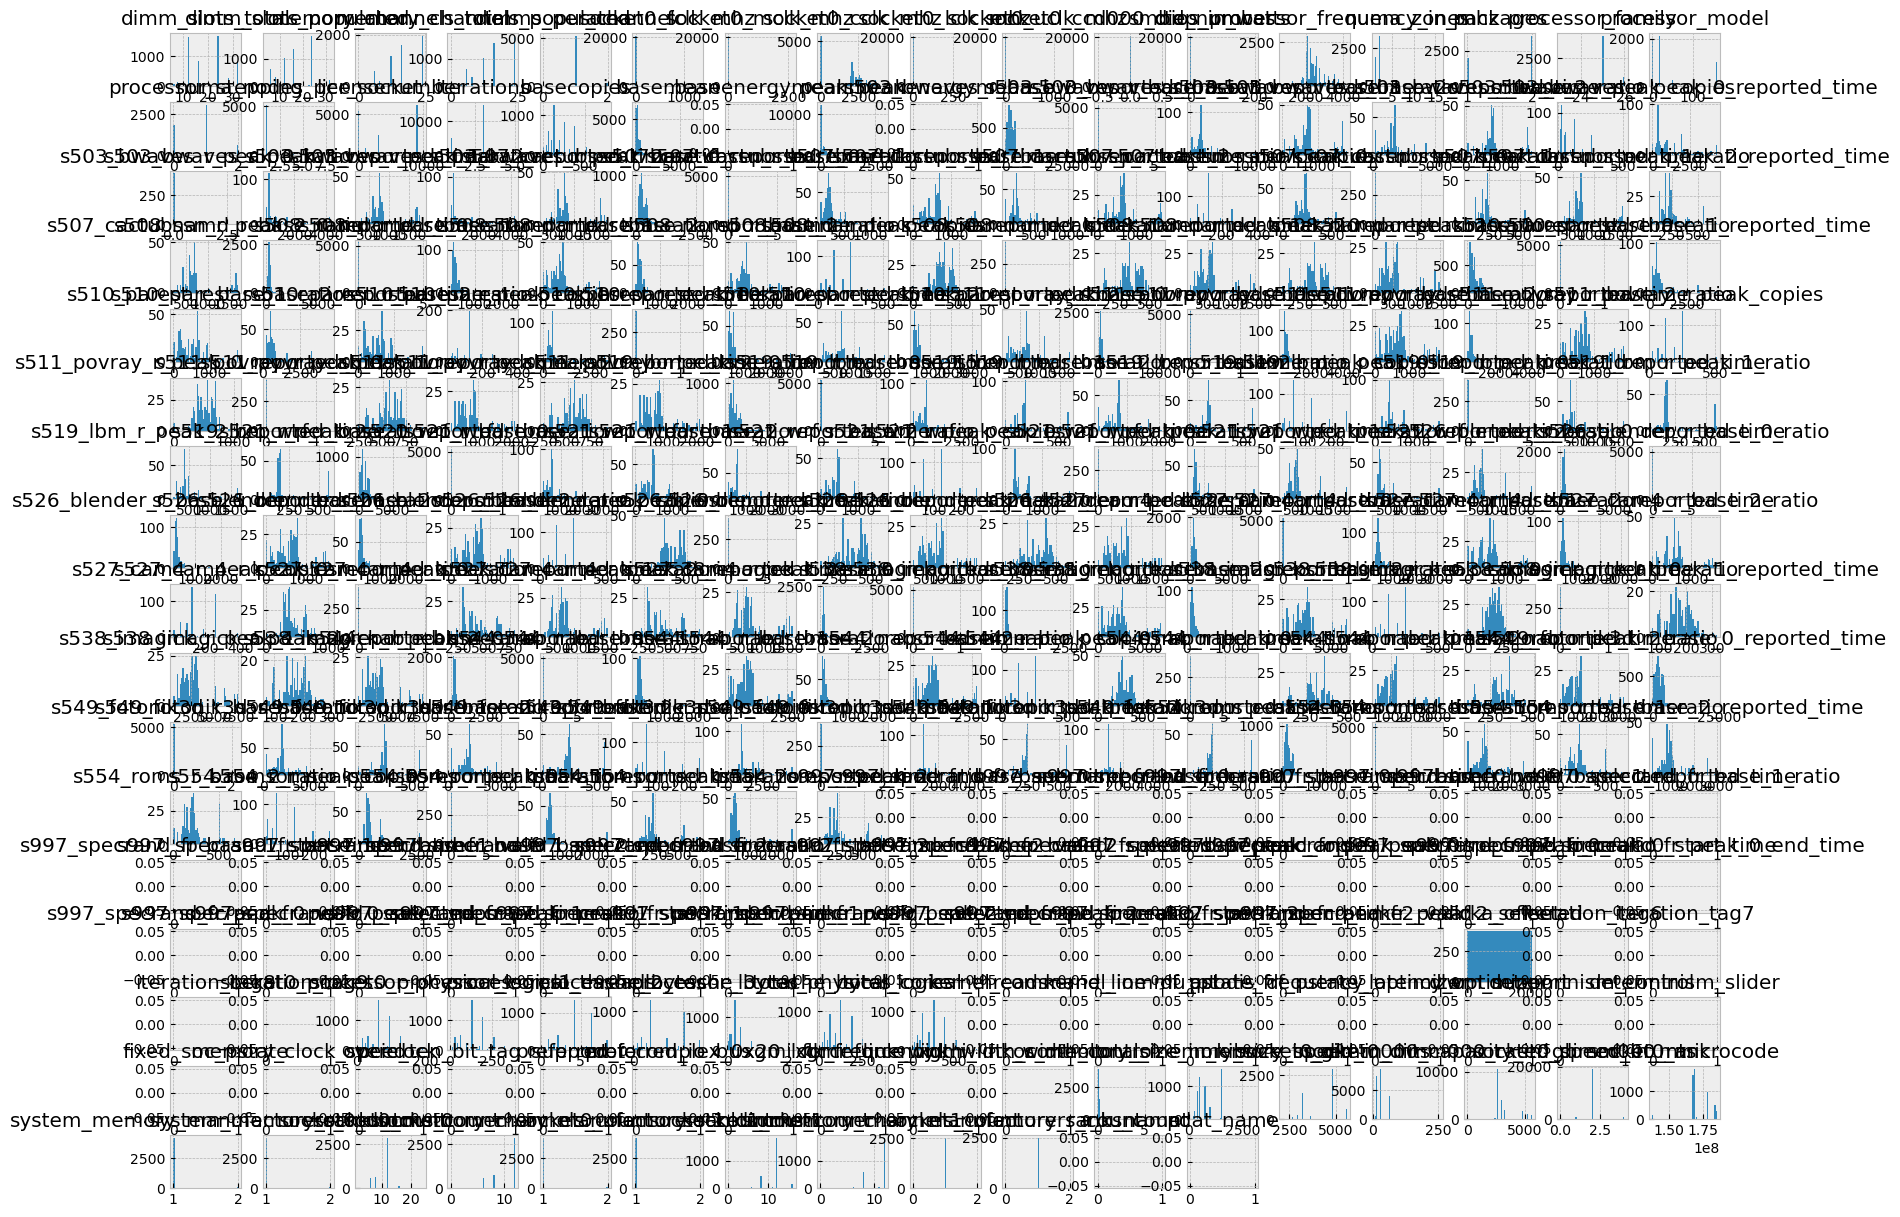

In [6]:
data.hist(bins=50, figsize=(20,15))

In [7]:
import pandas as pd
df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_counts = df['smbios_processor_version'].value_counts()

# 'category_counts' now contains the count of each unique value in 'feature_name'
# The most frequent category is the one with the highest count

most_frequent_category = category_counts.idxmax()
print(f"The most frequent category is: {most_frequent_category}")

# If you want to see the count for each category, you can print 'category_counts'
print("Category Counts:")
print(category_counts)

The most frequent category is: AMD EPYC 9654 96-Core Processor
Category Counts:
smbios_processor_version
AMD EPYC 9654 96-Core Processor             306
Intel Xeon Gold 5120                        299
Intel Xeon Platinum 8180                    296
Intel Xeon Gold 5118                        285
Intel Xeon Gold 6130                        275
                                           ... 
AMD Eng Sample: 100-000000508-01_37/30_N      1
AMD EPYC 7K62 48-Core Processor               1
AMD Eng Sample: 100-000000308-02_30/18_N      1
AMD Eng Sample: 100-000000425-02_37/23_N      1
AMD EPYC 9V33X 64-Core Processor              1
Name: count, Length: 395, dtype: int64


In [8]:
import pandas as pd


df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_df = df.groupby('smbios_processor_version')

# Now, 'category_df' is a grouped DataFrame where each group corresponds to a unique value in 'feature_name'
l=[]
# You can access each category using a loop, for example:
for category_name, category_data in category_df:
    # 'category_name' is the unique value in 'feature_name'
    # 'category_data' is the DataFrame corresponding to this category
    print(f"Category: {category_name}")
    l.append(category_data)
    # Perform operations specific to each category here

# If you want to access a specific category by its name:
specific_category = category_df.get_group('AMD EPYC 9654 96-Core Processor')


Category: AMD EPYC 7203 8-Core Processor
Category: AMD EPYC 7251
Category: AMD EPYC 7261
Category: AMD EPYC 7262
Category: AMD EPYC 7262 8-Core Processor
Category: AMD EPYC 7281
Category: AMD EPYC 7282 16-Core Processor
Category: AMD EPYC 72F3 8-Core Processor
Category: AMD EPYC 7301
Category: AMD EPYC 7302
Category: AMD EPYC 7302P
Category: AMD EPYC 7303 16-Core Processor
Category: AMD EPYC 7313 16-Core Processor
Category: AMD EPYC 7343 16-Core Processor
Category: AMD EPYC 7351
Category: AMD EPYC 7351P
Category: AMD EPYC 7352
Category: AMD EPYC 7352 24-Core Processor
Category: AMD EPYC 7371
Category: AMD EPYC 7373X 16-Core Processor
Category: AMD EPYC 73F3 16-Core Processor
Category: AMD EPYC 7401
Category: AMD EPYC 7401P
Category: AMD EPYC 7402
Category: AMD EPYC 7402 24-Core Processor
Category: AMD EPYC 7402P
Category: AMD EPYC 7413 24-Core Processor
Category: AMD EPYC 7443 24-Core Processor
Category: AMD EPYC 7451
Category: AMD EPYC 7452
Category: AMD EPYC 7452 32-Core Processor
Ca

Category: Intel Xeon Bronze 3104
Category: Intel Xeon Bronze 3106
Category: Intel Xeon Bronze 3204
Category: Intel Xeon D-1521
Category: Intel Xeon D-1541
Category: Intel Xeon D-1571
Category: Intel Xeon E-2104G
Category: Intel Xeon E-2124
Category: Intel Xeon E-2124G
Category: Intel Xeon E-2126G
Category: Intel Xeon E-2134
Category: Intel Xeon E-2136
Category: Intel Xeon E-2144G
Category: Intel Xeon E-2146G
Category: Intel Xeon E-2174G
Category: Intel Xeon E-2176G
Category: Intel Xeon E-2186G
Category: Intel Xeon E-2224G
Category: Intel Xeon E3-1220 v6
Category: Intel Xeon E3-1225 v6
Category: Intel Xeon E3-1230 v6
Category: Intel Xeon E3-1240 v6
Category: Intel Xeon E3-1240L v5
Category: Intel Xeon E3-1260L v5
Category: Intel Xeon E3-1270 v6
Category: Intel Xeon E3-1275 v6
Category: Intel Xeon E3-1280 v6
Category: Intel Xeon E5-2620 v4
Category: Intel Xeon E5-2650 v4
Category: Intel Xeon E5-2698 v4
Category: Intel Xeon E5-2699A v4
Category: Intel Xeon E7-4850 v4
Category: Intel Xeon 

In [9]:
data = specific_category

In [10]:
data

test_series                        iteration_guid  \
16369  SPECrate2017_fp  4da1dba2-bd89-4424-8582-7d398c783f2d   
16389  SPECrate2017_fp  5546a42c-256c-4223-83da-9bd1ec9b5c66   
16400  SPECrate2017_fp  1d014e49-9ea6-4704-adc9-c8eb6423a3d2   
16401  SPECrate2017_fp  32a4065c-d335-46d0-ab13-ab0bf4ce8523   
16405  SPECrate2017_fp  bf06880d-c75b-46bb-bea0-00fc177331f0   
...                ...                                   ...   
20561  SPECrate2017_fp  c4da96cb-6dec-4e73-b404-3bda2843560c   
20562  SPECrate2017_fp  c5656751-8aab-4c48-8ee6-0725ceda58a2   
20565  SPECrate2017_fp  c659338d-d0bc-4432-bdfb-ec7d268956b0   
20605  SPECrate2017_fp  e9fdaff4-ef1d-4045-9a69-fc875b429dc3   
20606  SPECrate2017_fp  ea2c297a-9dd2-4326-96d5-b796c393a3e0   

                  bmc_name bmc_version  dimm_slots_total  \
16369   titanite-1668.sppo        2.17              28.0   
16389   titanite-1794.sppo        2.17              28.0   
16400   titanite-1794.sppo        2.17              28.0   
16401   titanite-1794.sppo        2.17              28.0   
16405   titanite-1794.sppo        2.17              28.0   
...                    ...         ...               ...   
20561  quartz-b152.amd.com        2.17              12.0   
20562     quartz-7ba4.sppo        2.17              24.0   
20565  quartz-b152.amd.com        2.17              24.0   
20605     sp5-b128.amd.com        2.17              24.0   
20606     sp5-b116.amd.com        2.17              24.0   

       dimm_slots_populated  memory_channels_total  memory_channels_populated  \
16369                  24.0                   24.0                       24.0   
16389                  24.0                   24.0                       24.0   
16400                  24.0                   24.0                       24.0   
16401                  24.0                   24.0                       24.0   
16405                  24.0                   24.0                       24.0   
...                     ...                    ...                        ...   
20561                  12.0                   12.0                       12.0   
20562                  24.0                   24.0                       24.0   
20565                  24.0                   24.0                       24.0   
20605                  24.0                   24.0                       24.0   
20606                  24.0                   24.0                       24.0   

       dimms_per_channel socket0_name  ...               sut_name  \
16369                1.0           P0  ...           titanite-014   
16389                1.0           P0  ...     sppo-titanite-1794   
16400                1.0           P0  ...     sppo-titanite-1794   
16401                1.0           P0  ...     sppo-titanite-1794   
16405                1.0           P0  ...     sppo-titanite-1794   
...                  ...          ...  ...                    ...   
20561                1.0           P0  ...             amd-QUARTZ   
20562                1.0           P0  ...            quartz-7ba4   
20565                1.0           P0  ...             amd-QUARTZ   
20605                1.0           P0  ...  pmpd-quartz-b128-ms01   
20606                1.0           P0  ...  pmpd-quartz-b116-ms02   

       submitter_name                         submitter_email  display  \
16369      Shayantika         shayantika.bhattacharya@amd.com      NaN   
16389        v.mallya             v.mallya@sppo-titanite-1794      NaN   
16400        v.mallya             v.mallya@sppo-titanite-1794      NaN   
16401        v.mallya             v.mallya@sppo-titanite-1794      NaN   
16405        v.mallya             v.mallya@sppo-titanite-1794      NaN   
...               ...                                     ...      ...   
20561          jiahao                       jiahao@amd-QUARTZ      NaN   
20562             bob                    bob@quartz-7ba4.sppo      NaN   
20565          jiahao                       jiahao@am

In [11]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
corr_matrix = data.corr(method='pearson',numeric_only=True).head(10)
corr_matrix

dimm_slots_total  dimm_slots_populated  \
dimm_slots_total                   1.000000              0.952357   
dimm_slots_populated               0.952357              1.000000   
memory_channels_total              0.958140              0.992813   
memory_channels_populated          0.952357              1.000000   
dimms_per_channel                       NaN                   NaN   
socket0_fclk_mhz                        NaN                   NaN   
socket0_mclk_mhz                        NaN                   NaN   
socket0_cclk_mhz                        NaN                   NaN   
socket0_lclk_mhz                        NaN                   NaN   
socket0_uclk_mhz                        NaN                   NaN   

                           memory_channels_total  memory_channels_populated  \
dimm_slots_total                        0.958140                   0.952357   
dimm_slots_populated                    0.992813                   1.000000   
memory_channels_total                   1.000000                   0.992813   
memory_channels_populated               0.992813                   1.000000   
dimms_per_channel                            NaN                        NaN   
socket0_fclk_mhz                             NaN                        NaN   
socket0_mclk_mhz                             NaN                        NaN   
socket0_cclk_mhz                             NaN                        NaN   
socket0_lclk_mhz                             NaN                        NaN   
socket0_uclk_mhz                             NaN                        NaN   

                           dimms_per_channel  socket0_fclk_mhz  \
dimm_slots_total                         NaN               NaN   
dimm_slots_populated                     NaN               NaN   
memory_channels_total                    NaN               NaN   
memory_channels_populated                NaN               NaN   
dimms_per_channel                        NaN               NaN   
socket0_fclk_mhz                         NaN               NaN   
socket0_mclk_mhz                         NaN               NaN   
socket0_cclk_mhz                         NaN               NaN   
socket0_lclk_mhz                         NaN               NaN   
socket0_uclk_mhz                         NaN               NaN   

                           socket0_mclk_mhz  socket0_cclk_mhz  \
dimm_slots_total                        NaN               NaN   
dimm_slots_populated                    NaN               NaN   
memory_channels_total                   NaN               NaN   
memory_channels_populated               NaN               NaN   
dimms_per_channel                       NaN               NaN   
socket0_fclk_mhz                        NaN               NaN   
socket0_mclk_mhz                        NaN               NaN   
socket0_cclk_mhz                        NaN               NaN   
socket0_lclk_mhz                        NaN               NaN   
socket0_uclk_mhz                        NaN               NaN   

                           socket0_lclk_mhz  socket0_uclk_mhz  ...  \
dimm_slots_total                        NaN               NaN  ...   
dimm_slots_populated                    NaN               NaN  ...   
memory_channels_total                   NaN               NaN  ...   
memory_channels_populated               NaN               NaN  ...   
dimms_per_channel                       NaN               NaN  ...   
socket0_fclk_mhz                        NaN               NaN  ...   
socket0_mclk_mhz                        NaN               NaN  ...   
socket0_cclk_mhz                        NaN               NaN  ...   
socket0_lclk_mhz                        NaN               NaN  ...   
socket0_uclk_mhz                        NaN               NaN  ...   

                           socket0_dimms_count  socket0_memory_channels_count  \
dimm_slots_total                           NaN                            NaN   
dimm_slots_populated 

In [12]:
df=data
# Assuming df is your DataFrame and non_numeric_columns is a list of columns
non_numeric_columns = df.select_dtypes(exclude=[np.number, 'boolean']).columns
non_numeric_columns

Index(['test_series', 'iteration_guid', 'bmc_name', 'bmc_version',
       'socket0_name', 'socket0_iod_name', 'socket0_iod_serial_number',
       'socket0_ccd000_serial_number', 'socket0_ccd000_name',
       'socket0_ccd000_short_name',
       ...
       'iteration_start_date', 'iteration_stop_date', 'sut_name',
       'submitter_name', 'submitter_email', 'display', 'internal_use',
       'external_use', 'ppog_version', 'last_updated'],
      dtype='object', length=440)

In [13]:
df_cleaned = df.drop(columns=non_numeric_columns)
# Check the resulting DataFrame
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20561  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

In [14]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20561  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

In [15]:
numeric_cols = data.select_dtypes(include=['number','boolean']).columns
numeric_cols

Index(['dimm_slots_total', 'dimm_slots_populated', 'memory_channels_total',
       'memory_channels_populated', 'dimms_per_channel', 'socket0_fclk_mhz',
       'socket0_mclk_mhz', 'socket0_cclk_mhz', 'socket0_lclk_mhz',
       'socket0_uclk_mhz',
       ...
       'socket0_dimms_count', 'socket0_memory_channels_count',
       'socket0_memory_manufacturers_count', 'socket0_memory_ranks_count',
       'socket1_dimms_count', 'socket1_memory_channels_count',
       'socket1_memory_manufacturers_count', 'socket1_memory_ranks_count',
       'a_b_name', 'pdat_name'],
      dtype='object', length=284)

In [16]:
import pandas as pd

# Assuming df is your DataFrame with mixed data types
threshold_missing = 0.5  # Adjust the threshold based on your criteria

# Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Drop columns with a high percentage of missing values for numeric columns
df_numeric_cleaned = df_cleaned[numeric_cols].dropna(axis=1, thresh=int((1 - threshold_missing) * len(df_cleaned[numeric_cols])))

# Impute missing values for remaining numeric columns
df_numeric_cleaned = df_numeric_cleaned.fillna(df_numeric_cleaned.mean())

# Keep non-numeric columns
df_non_numeric = df_cleaned[non_numeric_cols]

# Concatenate the cleaned numeric and non-numeric DataFrames
df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  system_memory_manufacturers_count  system_memory_ranks_count  \
16369  ...                                1.0                        1.0   
16389  ...                                1.0                        1.0   
16400  ...                                1.0                        1.0   
16401  ...                                1.0                        1.0   
16405  ...                                1.0                        1.0   
...    ...                                ...                        ...   
20561  ...                                1.0                        1.0   
20562  ...                                1.0                        1.0   
20565  ...                                1.0                        1.0   
20605  ...                                1.0                        1.0   
20606  ...                                1.0                        1.0   

       socket0_dimms_count  socket0_memory_channels_count  \
16369                 12.0                           12.0   
16389                 12.0                           12.0   
16400                 12.0                           12.0   
16401                 12.0                           12.0   
16405                 12.0                           12.0   
...          

# Data Pre processing

In [17]:
import pandas as pd

# Assuming df_cleaned is your DataFrame with mixed data types
threshold_correlation = 0.8  # Adjust the correlation threshold

# Separate numeric and non-numeric columns
#numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
#on_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix_numeric = df_cleaned.corr()
correlation_matrix_numeric
# Identify highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix_numeric.columns)):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold_correlation:
            colname = correlation_matrix_numeric.columns[i]
            highly_correlated.add(colname)
highly_correlated
# # Drop highly correlated columns for numeric columns
# df_cleaned_numeric = df_cleaned[numeric_cols].drop(columns=highly_correlated)

# # # Concatenate cleaned numeric and non-numeric DataFrames
# df_cleaned = pd.concat([df_cleaned_numeric, df_cleaned[non_numeric_cols]], axis=1)
# df_cleaned

{'basemean',
 'dimm_slots_populated',
 'memory_channels_populated',
 'memory_channels_total',
 'numa_nodes_per_socket',
 'os_memory_size_in_kib',
 'packages',
 'peakmean',
 'processor_l1_cache_bytes',
 'processor_l2_cache_bytes',
 's503_bwaves_r_base_0_ratio',
 's503_bwaves_r_base_0_reported_time',
 's507_cactubssn_r_base_0_ratio',
 's507_cactubssn_r_base_0_reported_time',
 's508_namd_r_base_0_ratio',
 's508_namd_r_base_0_reported_time',
 's510_parest_r_base_0_ratio',
 's510_parest_r_base_0_reported_time',
 's511_povray_r_base_0_ratio',
 's511_povray_r_base_0_reported_time',
 's519_lbm_r_base_0_ratio',
 's519_lbm_r_base_0_reported_time',
 's521_wrf_r_base_0_ratio',
 's521_wrf_r_base_0_reported_time',
 's526_blender_r_base_0_ratio',
 's526_blender_r_base_0_reported_time',
 's527_cam4_r_base_0_ratio',
 's527_cam4_r_base_0_reported_time',
 's538_imagick_r_base_0_ratio',
 's538_imagick_r_base_0_reported_time',
 's544_nab_r_base_0_ratio',
 's544_nab_r_base_0_reported_time',
 's549_fotonik3d

In [18]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = df_cleaned
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

dimm_slots_total  dimm_slots_populated  \
dimm_slots_total                            1.000000              0.952357   
dimm_slots_populated                        0.952357              1.000000   
memory_channels_total                       0.958140              0.992813   
memory_channels_populated                   0.952357              1.000000   
dimms_per_channel                                NaN                   NaN   
...                                              ...                   ...   
socket0_memory_ranks_count                       NaN                   NaN   
socket1_dimms_count                         0.009216              0.119673   
socket1_memory_channels_count               0.009216              0.119673   
socket1_memory_manufacturers_count         -0.005393             -0.072127   
socket1_memory_ranks_count                       NaN                   NaN   

                                    memory_channels_total  \
dimm_slots_total                             9.581403e-01   
dimm_slots_populated                         9.928134e-01   
memory_channels_total                        1.000000e+00   
memory_channels_populated                    9.928134e-01   
dimms_per_channel                                     NaN   
...                                                   ...   
socket0_memory_ranks_count                            NaN   
socket1_dimms_count                         -7.174620e-16   
socket1_memory_channels_count               -7.174620e-16   
socket1_memory_manufacturers_count          -3.256880e-16   
socket1_memory_ranks_count                            NaN   

                                    memory_channels_populated  \
dimm_slots_total                                     0.952357   
dimm_slots_populated                                 1.000000   
memory_channels_total                                0.992813   
memory_channels_populated                            1.000000   
dimms_per_channel                                         NaN   
...                                                       ...   
socket0_memory_ranks_count                                NaN   
socket1_dimms_count                                  0.119673   
socket1_memory_channels_count                        0.119673   
socket1_memory_manufacturers_count                  -0.072127   
socket1_memory_ranks_count                                NaN   

                                    dimms_per_channel  socket0_fclk_mhz  \
dimm_slots_total                                  NaN               NaN   
dimm_slots_populated                              NaN               NaN   
memory_channels_total                             NaN               NaN   
memory_channels_populated                         NaN               NaN   
dimms_per_channel                                 NaN               NaN   
...                                               ...               ...   
socket0_memory_ranks_count                        NaN               NaN   
socket1_dimms_count                               NaN               NaN   
socket1_memory_channels_count                     NaN               NaN   
socket1_memory_manufacturers_count                NaN               NaN   
socket1_memory_ranks_count                        NaN               NaN   

                                    socket0_mclk_mhz  socket0_cclk_mhz  \
dimm_slots_total                                 NaN               NaN   
dimm_slots_populated                             NaN               NaN   
memory_channels_total                            NaN               NaN   
memory_channels_populated                        NaN               NaN   
dimms_per_channel                                NaN               NaN   
...                                              ...               ...   
socket0_memory_ranks_count                       NaN               NaN   
socket1_dimms_count                              NaN               NaN   
socket1_memory_cha

In [19]:
import sweetviz as sv

report = sv.analyze(df_cleaned)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [20]:
 df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  system_memory_manufacturers_count  system_memory_ranks_count  \
16369  ...                                1.0                        1.0   
16389  ...                                1.0                        1.0   
16400  ...                                1.0                        1.0   
16401  ...                                1.0                        1.0   
16405  ...                                1.0                        1.0   
...    ...                                ...                        ...   
20561  ...                                1.0                        1.0   
20562  ...                                1.0                        1.0   
20565  ...                                1.0                        1.0   
20605  ...                                1.0                        1.0   
20606  ...                                1.0                        1.0   

       socket0_dimms_count  socket0_memory_channels_count  \
16369                 12.0                           12.0   
16389                 12.0                           12.0   
16400                 12.0                           12.0   
16401                 12.0                           12.0   
16405                 12.0                           12.0   
...          

In [21]:
data = df_cleaned

In [22]:
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  system_memory_manufacturers_count  system_memory_ranks_count  \
16369  ...                                1.0                        1.0   
16389  ...                                1.0                        1.0   
16400  ...                                1.0                        1.0   
16401  ...                                1.0                        1.0   
16405  ...                                1.0                        1.0   
...    ...                                ...                        ...   
20561  ...                                1.0                        1.0   
20562  ...                                1.0                        1.0   
20565  ...                                1.0                        1.0   
20605  ...                                1.0                        1.0   
20606  ...                                1.0                        1.0   

       socket0_dimms_count  socket0_memory_channels_count  \
16369                 12.0                           12.0   
16389                 12.0                           12.0   
16400                 12.0                           12.0   
16401                 12.0                           12.0   
16405                 12.0                           12.0   
...          

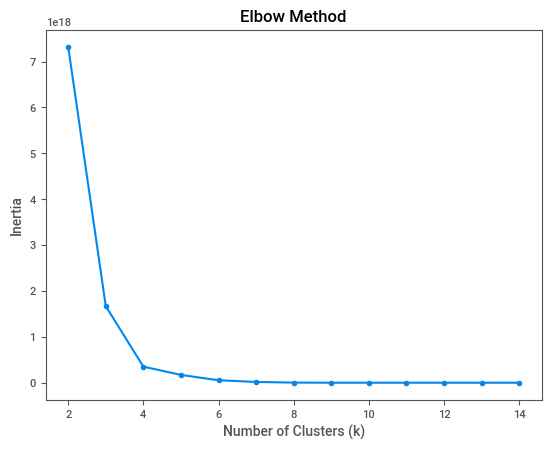

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_data is your standardized data
inertias = []
possible_k_values = range(2, 15)  # You can adjust the range based on your data

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [24]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'data' is your dataset with columns for min Gflops, max Gflops, and different tests
test_data = data
# Extract relevant columns
#test_columns = data.columns[2:]  # Assuming columns 0 and 1 are for min and max Gflops
#X = data[['basemean', 'peakmean'] + test_columns]
columns_to_exclude = ['basemean', 'peakmean']
filtered_data = test_data.drop(columns=columns_to_exclude)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# # Choose the number of clusters (you may need to adjust this based on your data)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# # Visualize clusters in 3D (assuming you have at least three test columns)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# for cluster in range(n_clusters):
#     cluster_data = data[data['cluster'] == cluster]
#     ax.scatter(cluster_data['basemean'], cluster_data['peakmean'], cluster_data[filtered_data[0]],
#                label=f'Cluster {cluster + 1}')

# ax.set_xlabel('Min Gflops')
# ax.set_ylabel('Max Gflops')
# ax.set_zlabel(test_columns[0])
# ax.set_title('Clustering Visualization')
# ax.legend()

# plt.show()
#filtered_data
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  system_memory_ranks_count  socket0_dimms_count  \
16369  ...                        1.0                 12.0   
16389  ...                        1.0                 12.0   
16400  ...                        1.0                 12.0   
16401  ...                        1.0                 12.0   
16405  ...                        1.0                 12.0   
...    ...                        ...                  ...   
20561  ...                        1.0                 12.0   
20562  ...                        1.0                 12.0   
20565  ...                        1.0                 12.0   
20605  ...                        1.0                 12.0   
20606  ...                        1.0                 12.0   

       socket0_memory_channels_count  socket0_memory_manufacturers_count  \
16369                           12.0                                 1.0   
16389                           12.0                                 1.0   
16400                           12.0                                 1.0   
16401                           12.0                                 1.0   
16405                           12.0                                 1.0   
...                              ...                                 ...   
20561          

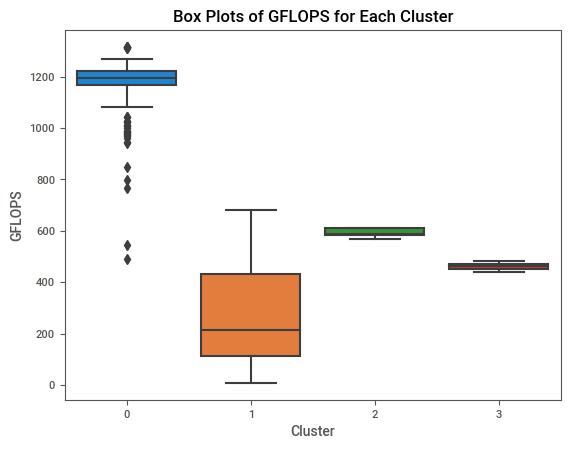

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('GFLOPS')
plt.title('Box Plots of GFLOPS for Each Cluster')
plt.show()

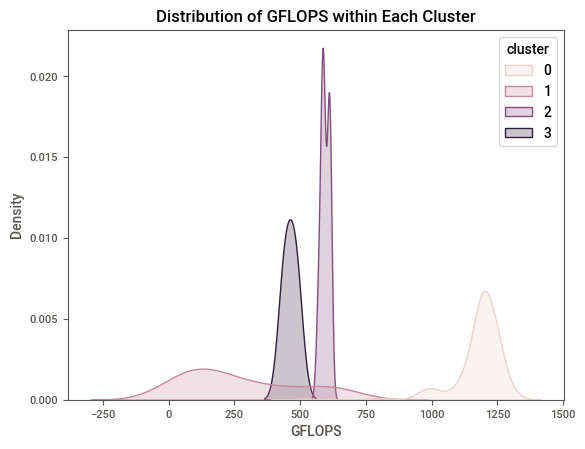

In [26]:
sns.kdeplot(x='basemean', hue='cluster', data=data, fill=True, common_norm=False)
plt.xlabel('GFLOPS')
plt.title('Distribution of GFLOPS within Each Cluster')
plt.show()

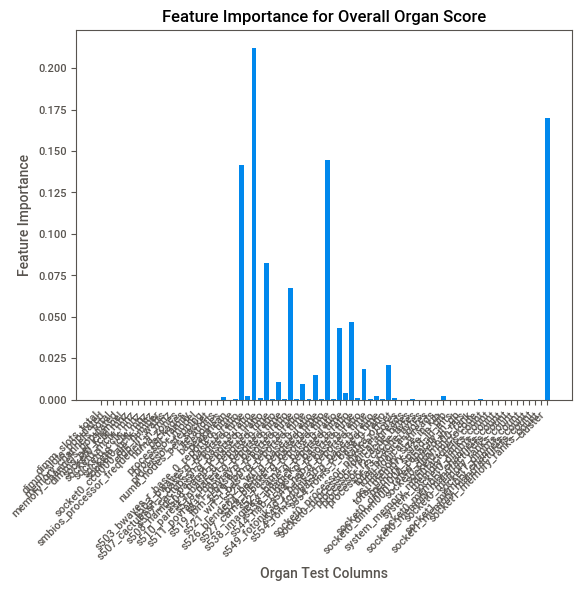

In [27]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
df=data
# Assuming df is your DataFrame
X = df.drop('basemean', axis=1)  # Features (organ test columns)
y = df['basemean']  # Target variable (overall organ score)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Organ Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Overall Organ Score')
plt.xticks(rotation=45, ha='right')
plt.show()


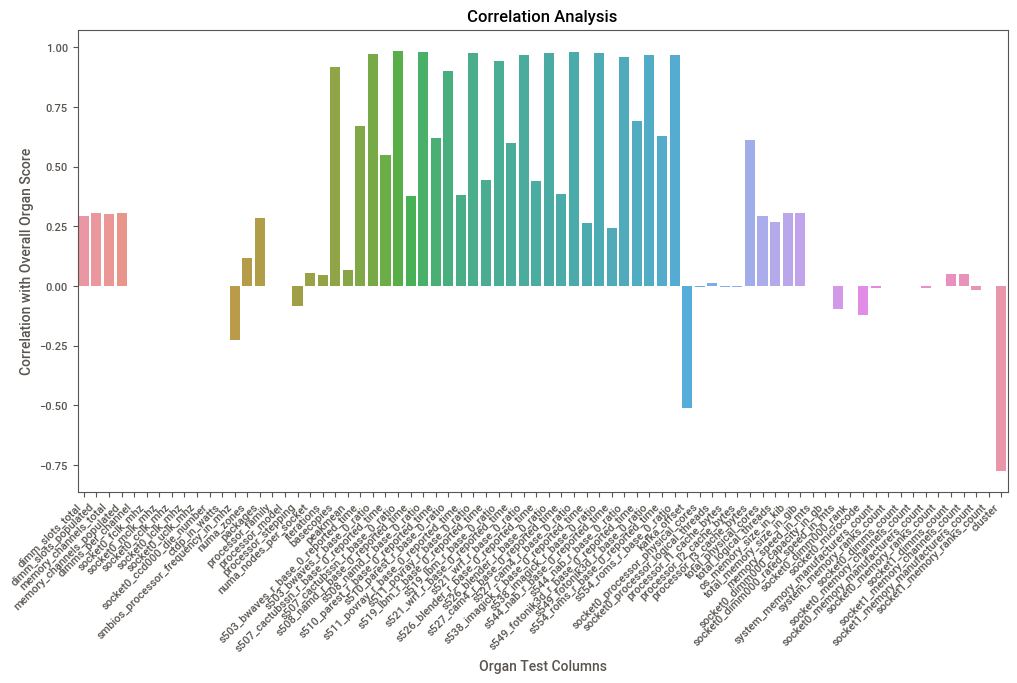

In [28]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Organ Test Columns')
plt.ylabel('Correlation with Overall Organ Score')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


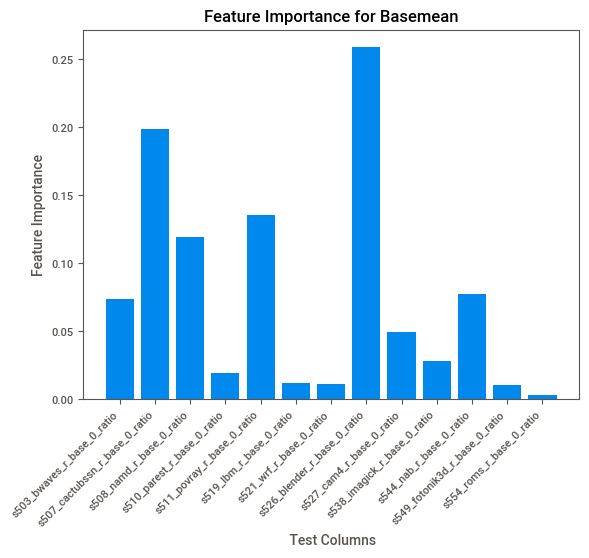

In [29]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
df=data
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming df is your DataFrame
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean']   # Target variable (overall organ score)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel(' Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


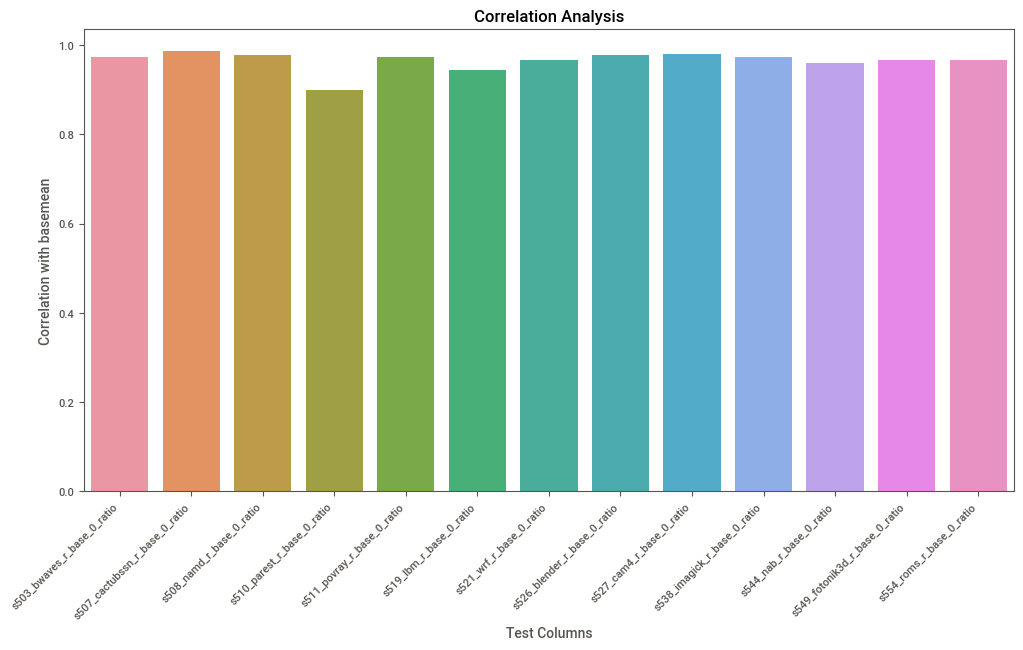

In [30]:
import seaborn as sns
# Assuming df is your DataFrame
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

# Display the selected columns
#print(selected_columns)

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Test Columns')
plt.ylabel('Correlation with basemean')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming you have a dataset 'X' and target variable 'y'
# Replace this with your actual dataset and target variable
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

y_pred = rf_model.predict(X)


In [32]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = selected_columns
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

basemean  s503_bwaves_r_base_0_ratio  \
basemean                       1.000000                    0.971978   
s503_bwaves_r_base_0_ratio     0.971978                    1.000000   
s507_cactubssn_r_base_0_ratio  0.985444                    0.984013   
s508_namd_r_base_0_ratio       0.977761                    0.941266   
s510_parest_r_base_0_ratio     0.898439                    0.868945   
s511_povray_r_base_0_ratio     0.973923                    0.942443   
s519_lbm_r_base_0_ratio        0.943048                    0.944779   
s521_wrf_r_base_0_ratio        0.966592                    0.974815   
s526_blender_r_base_0_ratio    0.976906                    0.948073   
s527_cam4_r_base_0_ratio       0.979794                    0.951352   
s538_imagick_r_base_0_ratio    0.973603                    0.940899   
s544_nab_r_base_0_ratio        0.958807                    0.914970   
s549_fotonik3d_r_base_0_ratio  0.966578                    0.996819   
s554_roms_r_base_0_ratio       0.966735                    0.977903   

                               s507_cactubssn_r_base_0_ratio  \
basemean                                            0.985444   
s503_bwaves_r_base_0_ratio                          0.984013   
s507_cactubssn_r_base_0_ratio                       1.000000   
s508_namd_r_base_0_ratio                            0.962330   
s510_parest_r_base_0_ratio                          0.884468   
s511_povray_r_base_0_ratio                          0.960108   
s519_lbm_r_base_0_ratio                             0.956334   
s521_wrf_r_base_0_ratio                             0.975584   
s526_blender_r_base_0_ratio                         0.967938   
s527_cam4_r_base_0_ratio                            0.976804   
s538_imagick_r_base_0_ratio                         0.963441   
s544_nab_r_base_0_ratio                             0.937912   
s549_fotonik3d_r_base_0_ratio                       0.982349   
s554_roms_r_base_0_ratio                            0.974056   

                               s508_namd_r_base_0_ratio  \
basemean                                       0.977761   
s503_bwaves_r_base_0_ratio                     0.941266   
s507_cactubssn_r_base_0_ratio                  0.962330   
s508_namd_r_base_0_ratio                       1.000000   
s510_parest_r_base_0_ratio                     0.881475   
s511_povray_r_base_0_ratio                     0.996652   
s519_lbm_r_base_0_ratio                        0.907555   
s521_wrf_r_base_0_ratio                        0.929209   
s526_blender_r_base_0_ratio                    0.993514   
s527_cam4_r_base_0_ratio                       0.984458   
s538_imagick_r_base_0_ratio                    0.986539   
s544_nab_r_base_0_ratio                        0.980972   
s549_fotonik3d_r_base_0_ratio                  0.938298   
s554_roms_r_base_0_ratio                       0.933160   

                               s510_parest_r_base_0_ratio  \
basemean                                         0.898439   
s503_bwaves_r_base_0_ratio                       0.868945   
s507_cactubssn_r_base_0_ratio                    0.884468   
s508_namd_r_base_0_ratio                         0.881475   
s510_parest_r_base_0_ratio                       1.000000   
s511_povray_r_base_0_ratio                       0.858988   
s519_lbm_r_base_0_ratio                          0.857391   
s521_wrf_r_base_0_ratio                          0.928846   
s526_blender_r_base_0_ratio                      0.856035   
s527_cam4_r_base_0_ratio                         0.881159   
s538_imagick_r_base_0_ratio                      0.842459   
s544_nab_r_base_0_ratio                          0.861121   
s549_fotonik3d_r_base_0_ratio                    0.865888   
s554_roms_r_base_0_ratio                         0.921461   

                               s511_povray_r_base_0_ratio  \
basemean                                         0.973923   
s503_bwaves_r_base_0_ratio                       0.942443   
s507_cactubssn_r_ba

In [33]:
import pandas as pd

# Assuming df is your DataFrame containing the features
# Replace 'features' with the actual columns in your dataset
features = selected_columns

# Compute the correlation matrix
correlation_matrix = features.corr()

# Set a threshold for correlation strength
correlation_threshold = 0.8  # You can adjust this threshold as needed

# Find highly correlated pairs
highly_correlated_pairs = []
weakly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)
        else:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            weakly_correlated_pairs.append(pair)

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

# Print weakly correlated pairs
print("\nWeakly Correlated Pairs:")
for pair in weakly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")


Highly Correlated Pairs:
s503_bwaves_r_base_0_ratio - basemean : 0.9719783995266028
s507_cactubssn_r_base_0_ratio - basemean : 0.9854443242852663
s507_cactubssn_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.9840126640960168
s508_namd_r_base_0_ratio - basemean : 0.9777607310318568
s508_namd_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.9412656839728176
s508_namd_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.962330003133978
s510_parest_r_base_0_ratio - basemean : 0.8984389095188209
s510_parest_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.8689447419588134
s510_parest_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.8844684876763851
s510_parest_r_base_0_ratio - s508_namd_r_base_0_ratio : 0.8814747297078556
s511_povray_r_base_0_ratio - basemean : 0.973923455162099
s511_povray_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.9424427309537211
s511_povray_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.960107509768609
s511_povray_r_base_0_ratio - s508_namd_r_base_0_ratio : 0.99

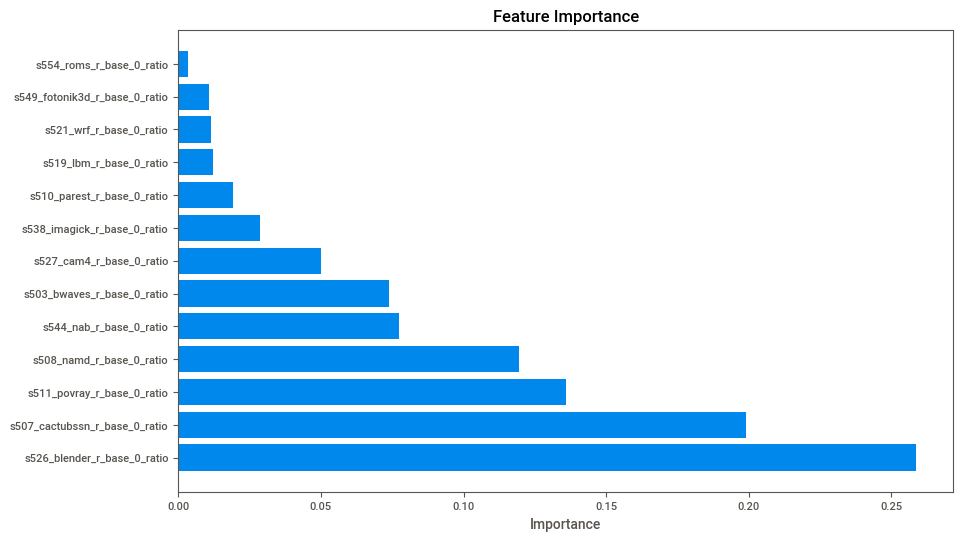

In [34]:

# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [35]:

# Feature importance threshold
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

print(f'Features with Importance > {threshold}: {important_features}')


Features with Importance > 0.02: ['s526_blender_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's503_bwaves_r_base_0_ratio', 's527_cam4_r_base_0_ratio', 's538_imagick_r_base_0_ratio']


In [36]:

# Select top N important features
top_n = 5
selected_features = feature_importance_df['Feature'][:top_n].tolist()

print(f'Top {top_n} Important Features: {selected_features}')

Top 5 Important Features: ['s526_blender_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio']


In [37]:
# Feature importance vs. correlation
correlation_matrix = X.corr()

# Iterate through features and their importance
for feature in selected_features:
    correlation_with_target = correlation_matrix[feature]  # Replace 'target' with your actual target variable
    print(f'Correlation between {feature} and target: {correlation_with_target}')


Correlation between s526_blender_r_base_0_ratio and target: s503_bwaves_r_base_0_ratio       0.948073
s507_cactubssn_r_base_0_ratio    0.967938
s508_namd_r_base_0_ratio         0.993514
s510_parest_r_base_0_ratio       0.856035
s511_povray_r_base_0_ratio       0.996885
s519_lbm_r_base_0_ratio          0.895400
s521_wrf_r_base_0_ratio          0.926220
s526_blender_r_base_0_ratio      1.000000
s527_cam4_r_base_0_ratio         0.990653
s538_imagick_r_base_0_ratio      0.988926
s544_nab_r_base_0_ratio          0.975615
s549_fotonik3d_r_base_0_ratio    0.944163
s554_roms_r_base_0_ratio         0.928226
Name: s526_blender_r_base_0_ratio, dtype: float64
Correlation between s507_cactubssn_r_base_0_ratio and target: s503_bwaves_r_base_0_ratio       0.984013
s507_cactubssn_r_base_0_ratio    1.000000
s508_namd_r_base_0_ratio         0.962330
s510_parest_r_base_0_ratio       0.884468
s511_povray_r_base_0_ratio       0.960108
s519_lbm_r_base_0_ratio          0.956334
s521_wrf_r_base_0_ratio       

In [38]:
# Feature engineering (example: multiplying two important features)
X['new_feature_1'] = X['s526_blender_r_base_0_ratio'] * X['s507_cactubssn_r_base_0_ratio']

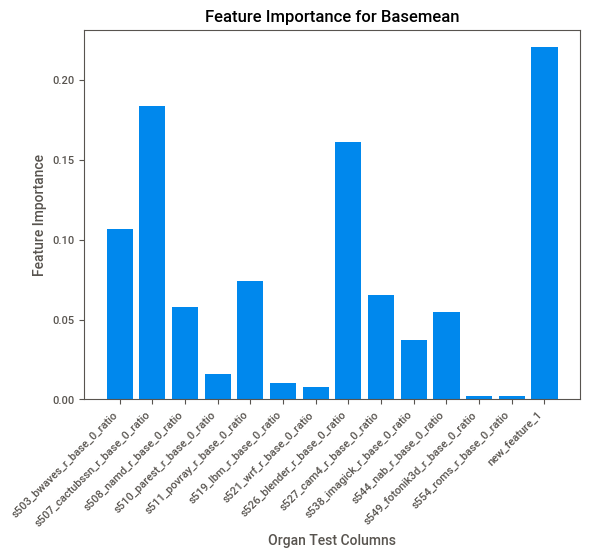

In [39]:
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Organ Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 1.0, 'Distribution of Overall Scores')

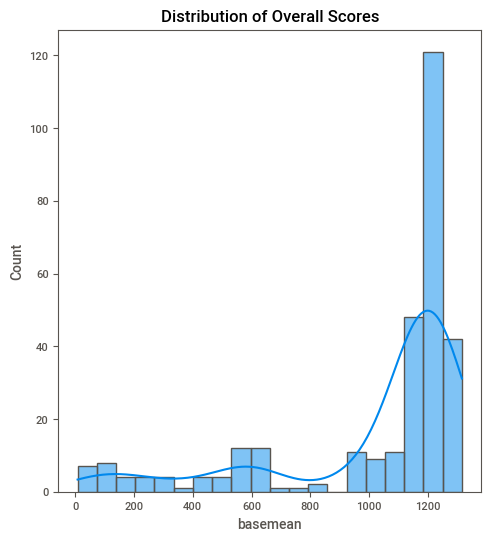

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'overall_score' and 'max_overall_score' are your column names
overall_score_column = 'basemean'
max_overall_score_column = 'peakmean'

# Data Exploration
# Histogram and Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[overall_score_column], bins=20, kde=True)
plt.title('Distribution of Overall Scores')




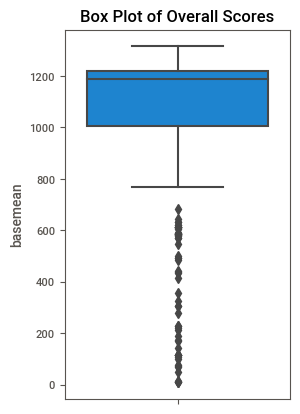

          basemean     peakmean
count   306.000000   306.000000
mean   1020.060680    31.198854
std     345.056224   191.402643
min       8.519278    -1.000000
25%    1007.168576    -1.000000
50%    1186.805901    -1.000000
75%    1220.092605    -1.000000
max    1315.223915  1324.639475


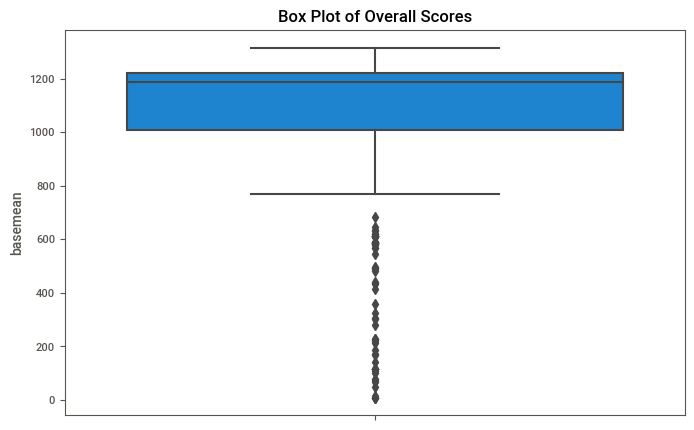

In [41]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

# Summary Statistics
summary_stats = df[[overall_score_column, max_overall_score_column]].describe()
print(summary_stats)

# Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

In [42]:
# Correlation Analysis
correlation_matrix = df[[overall_score_column, max_overall_score_column]].corr()
print(correlation_matrix)

# Feature Importance (using hypothetical machine learning model)
# Assuming X contains your input features and y is the overall score
from sklearn.ensemble import RandomForestRegressor

X = df.drop([overall_score_column, max_overall_score_column], axis=1)  # Adjust this based on your actual DataFrame
y = df[overall_score_column]

model = RandomForestRegressor()
model.fit(X, y)

# Display Feature Importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(f'Features with Importance > {threshold}: {important_features}')

          basemean  peakmean
basemean  1.000000  0.065563
peakmean  0.065563  1.000000
Features with Importance > 0.02: ['s507_cactubssn_r_base_0_ratio', 'cluster', 's526_blender_r_base_0_ratio', 's503_bwaves_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's527_cam4_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's538_imagick_r_base_0_ratio']


In [43]:
from sklearn.cluster import KMeans

# Assuming X contains your input features
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters based on your data
df['cluster'] = kmeans.fit_predict(X)


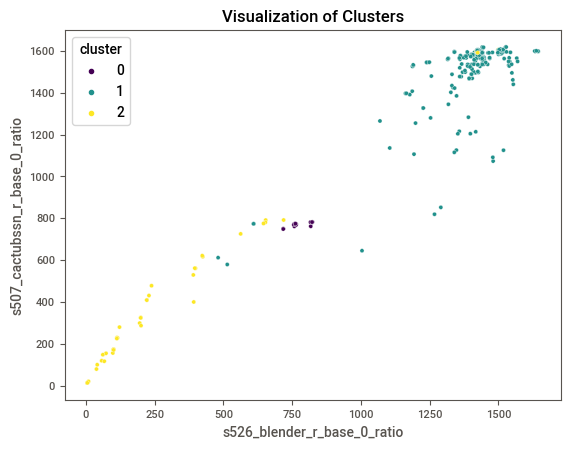

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='s526_blender_r_base_0_ratio', y='s507_cactubssn_r_base_0_ratio', hue='cluster', data=df, palette='viridis')
plt.title('Visualization of Clusters')
plt.show()


In [45]:
from scipy.stats import zscore

df['z_score'] = zscore(df[overall_score_column])
outliers = df[df['z_score'].abs() > 1]
outliers

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16389              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16544              24.0                  24.0                   24.0   
16874              24.0                  24.0                   24.0   
16945              12.0                  12.0                   12.0   
17047              24.0                  24.0                   24.0   
17085              24.0                  24.0                   24.0   
17097              24.0                  24.0                   24.0   
17188              24.0                  24.0                   24.0   
17393              24.0                  24.0                   24.0   
17407              24.0                  24.0                   24.0   
17412              24.0                  24.0                   24.0   
17475              12.0                  12.0                   12.0   
17510              24.0                  24.0                   24.0   
17632              12.0                  12.0                   12.0   
17856              12.0                  12.0                   12.0   
17876              24.0                  24.0                   24.0   
17916              24.0                  24.0                   24.0   
17936              12.0                  12.0                   12.0   
18134              12.0                  12.0                   12.0   
18153              12.0                  12.0                   12.0   
18167              24.0                  24.0                   24.0   
18188              24.0                  24.0                   24.0   
18315              24.0                  24.0                   24.0   
18351              24.0                  24.0                   24.0   
18512              24.0                  24.0                   24.0   
18560              12.0                  12.0                   12.0   
18580              24.0                  24.0                   24.0   
18723              12.0                  12.0                   12.0   
18755              24.0                  24.0                   24.0   
18802              24.0                  24.0                   24.0   
18808              24.0                  24.0                   24.0   
18810              24.0                  24.0                   24.0   
18859              24.0                  24.0                   24.0   
18963              24.0                  24.0                   24.0   
19035              24.0                  24.0                   24.0   
19310              24.0                  24.0                   24.0   
19409              12.0                  12.0                   12.0   
19455              24.0                  24.0                   24.0   
19486              24.0                  24.0                   24.0   
19504              24.0                  24.0                   24.0   
19507              24.0                  24.0                   24.0   
19525              24.0                  24.0                   24.0   
19640              24.0                  24.0                   24.0   
19722              24.0                  24.0                   24.0   
19836              24.0                  24.0                   24.0   
19947              12.0                  12.0                   12.0   
20124              24.0                  24.0                   24.0   
20198              12.0                  12.0                   12.0   
20233              24.0                  24.0                   24.0   
20268              24.0                  24.0                   24.0   
20287              24.0                  24.0                   24.0   
20297              12.0                  12.0                   12.0   
20316              24.0                  24.0                   24.0   
20390              24.0                  24.0  

In [46]:
df[overall_score_column]

16369    1152.125950
16389     620.000830
16400    1259.401935
16401     620.000830
16405    1223.415379
            ...     
20561     587.119470
20562    1165.731580
20565    1110.195804
20605    1193.699177
20606    1170.120670
Name: basemean, Length: 306, dtype: float64

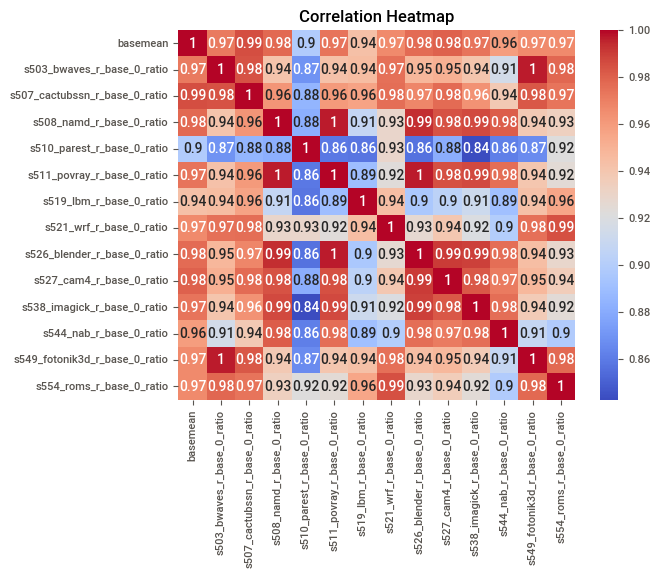

In [47]:
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# What have been done

## 1. Feature Importance - Linear vs non linear Relationship
## 2. Detecting Outlier
## 3. Predicting Basemean/Peakmean
## 4. Clustering 

### Observations 
1. Linear relationship between the test feature are very high
2. Non linear relationship gives good insights - Top 5 Important Features: ['s526_blender_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio']
and did some Feature engineering for testing and confirm these testing feature are importance.


In [48]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,
 test_size=0.2,
 random_state=42,
 shuffle=True)
train_set

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
19443              24.0                  24.0                   24.0   
19851              24.0                  24.0                   24.0   
17305              24.0                  24.0                   24.0   
18875              24.0                  24.0                   24.0   
17087              24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
19011              24.0                  24.0                   24.0   
17260              24.0                  24.0                   24.0   
17739              24.0                  24.0                   24.0   
20268              24.0                  24.0                   24.0   
17652              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
19443                       24.0                1.0              -1.0   
19851                       24.0                1.0              -1.0   
17305                       24.0                1.0              -1.0   
18875                       24.0                1.0              -1.0   
17087                       24.0                1.0              -1.0   
...                          ...                ...               ...   
19011                       24.0                1.0              -1.0   
17260                       24.0                1.0              -1.0   
17739                       24.0                1.0              -1.0   
20268                       24.0                1.0              -1.0   
17652                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
19443              -1.0              -1.0              -1.0              -1.0   
19851              -1.0              -1.0              -1.0              -1.0   
17305              -1.0              -1.0              -1.0              -1.0   
18875              -1.0              -1.0              -1.0              -1.0   
17087              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
19011              -1.0              -1.0              -1.0              -1.0   
17260              -1.0              -1.0              -1.0              -1.0   
17739              -1.0              -1.0              -1.0              -1.0   
20268              -1.0              -1.0              -1.0              -1.0   
17652              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
19443  ...                 12.0                           12.0   
19851  ...                 12.0                           12.0   
17305  ...                 12.0                           12.0   
18875  ...                 12.0                           12.0   
17087  ...                 12.0                           12.0   
...    ...                  ...                            ...   
19011  ...                 12.0                           12.0   
17260  ...                 12.0                           12.0   
17739  ...                 12.0                           12.0   
20268  ...                 12.0                           12.0   
17652  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
19443                                 1.0                         1.0   
19851                                 1.0                         1.0   
17305                                 1.0                         1.0   
18875                                 1.0                         1.0   
17087                                 1.0                         1.0   
...                                   ...                    

In [49]:
t_train = train_set['basemean'].copy()
X_train = train_set.drop(labels='basemean', axis=1)
# axis=1 means it's a column in the dataframe

t_train.shape, X_train.shape

((244,), (244, 75))

In [50]:
t_test = test_set['basemean'].copy()
X_test = test_set.drop(labels='basemean', axis=1)

t_test.shape, X_test.shape

((62,), (62, 75))

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assume 'X' contains the test columns, and 'y' contains the overall scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6765.060821384827


In [52]:
X_train

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
19443              24.0                  24.0                   24.0   
19851              24.0                  24.0                   24.0   
17305              24.0                  24.0                   24.0   
18875              24.0                  24.0                   24.0   
17087              24.0                  24.0                   24.0   
...                 ...                   ...                    ...   
19011              24.0                  24.0                   24.0   
17260              24.0                  24.0                   24.0   
17739              24.0                  24.0                   24.0   
20268              24.0                  24.0                   24.0   
17652              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
19443                       24.0                1.0              -1.0   
19851                       24.0                1.0              -1.0   
17305                       24.0                1.0              -1.0   
18875                       24.0                1.0              -1.0   
17087                       24.0                1.0              -1.0   
...                          ...                ...               ...   
19011                       24.0                1.0              -1.0   
17260                       24.0                1.0              -1.0   
17739                       24.0                1.0              -1.0   
20268                       24.0                1.0              -1.0   
17652                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
19443              -1.0              -1.0              -1.0              -1.0   
19851              -1.0              -1.0              -1.0              -1.0   
17305              -1.0              -1.0              -1.0              -1.0   
18875              -1.0              -1.0              -1.0              -1.0   
17087              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
19011              -1.0              -1.0              -1.0              -1.0   
17260              -1.0              -1.0              -1.0              -1.0   
17739              -1.0              -1.0              -1.0              -1.0   
20268              -1.0              -1.0              -1.0              -1.0   
17652              -1.0              -1.0              -1.0              -1.0   

       ...  system_memory_ranks_count  socket0_dimms_count  \
19443  ...                        1.0                 12.0   
19851  ...                        1.0                 12.0   
17305  ...                        1.0                 12.0   
18875  ...                        1.0                 12.0   
17087  ...                        1.0                 12.0   
...    ...                        ...                  ...   
19011  ...                        1.0                 12.0   
17260  ...                        1.0                 12.0   
17739  ...                        1.0                 12.0   
20268  ...                        1.0                 12.0   
17652  ...                        1.0                 12.0   

       socket0_memory_channels_count  socket0_memory_manufacturers_count  \
19443                           12.0                                 1.0   
19851                           12.0                                 1.0   
17305                           12.0                                 1.0   
18875                           12.0                                 1.0   
17087                           12.0                                 1.0   
...                              ...                                 ...   
19011          

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with test columns and overall score
test_columns = selected_columns  # Selecting relevant columns
overall_score = data['basemean']

# Combine test columns and overall score
combined_data = pd.concat([test_columns, overall_score], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(combined_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame
combined_data['Cluster'] = kmeans.labels_

# Analyze the results
cluster_summary = combined_data.groupby('Cluster').mean()
print(cluster_summary)


            basemean  s503_bwaves_r_base_0_ratio  \
Cluster                                            
0         591.652859                  817.508960   
1        1179.526666                 1606.287453   
2         150.638010                  325.943711   

         s507_cactubssn_r_base_0_ratio  s508_namd_r_base_0_ratio  \
Cluster                                                            
0                           741.013334                531.825339   
1                          1536.219580               1077.231156   
2                           212.219611                102.928968   

         s510_parest_r_base_0_ratio  s511_povray_r_base_0_ratio  \
Cluster                                                           
0                        504.812380                  782.964422   
1                        794.556471                 1594.644548   
2                        152.548653                  137.212248   

         s519_lbm_r_base_0_ratio  s521_wrf_r_base_0_ratio  \
C

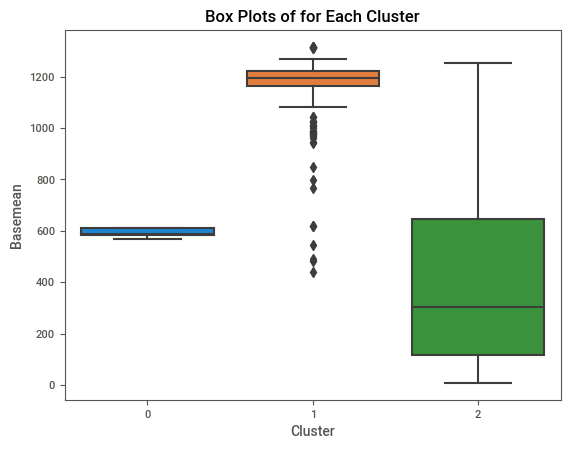

In [54]:
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('Basemean')
plt.title('Box Plots of for Each Cluster')
plt.show()


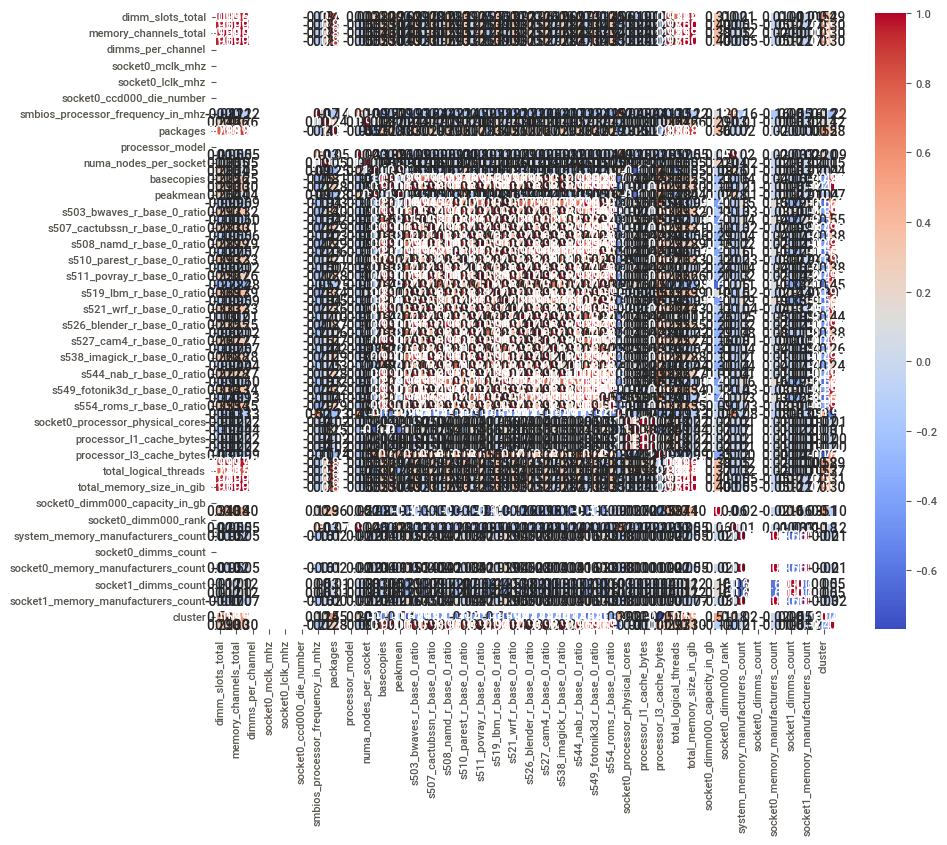

In [55]:
# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns = ['s507_cactubssn_r_base_0_ratio', 's526_blender_r_base_0_ratio', 'cluster', 's511_povray_r_base_0_ratio', 's527_cam4_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's503_bwaves_r_base_0_ratio']

# Select the relevant columns
selected_columns = important_test_columns + ['basemean']

# Create a DataFrame with selected columns
selected_data = df_cleaned

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


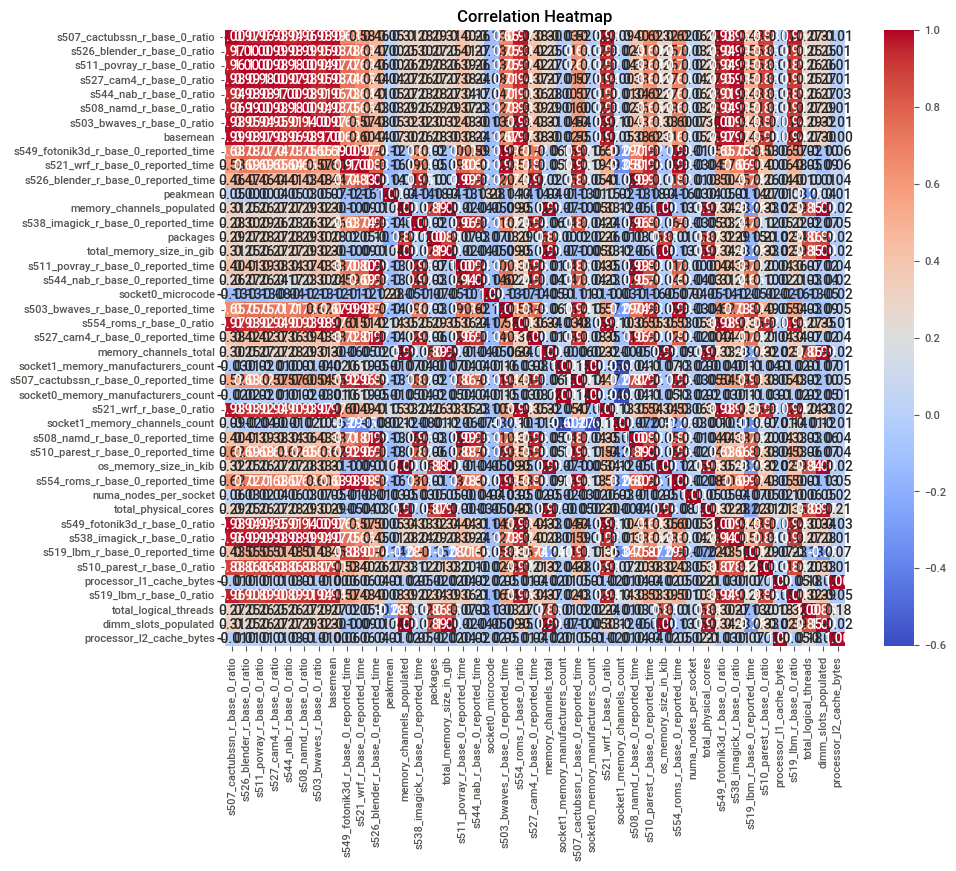

Top Contributing Columns to basemean:
s507_cactubssn_r_base_0_ratio            0.985444
s527_cam4_r_base_0_ratio                 0.979794
s508_namd_r_base_0_ratio                 0.977761
s526_blender_r_base_0_ratio              0.976906
s511_povray_r_base_0_ratio               0.973923
s538_imagick_r_base_0_ratio              0.973603
s503_bwaves_r_base_0_ratio               0.971978
s554_roms_r_base_0_ratio                 0.966735
s521_wrf_r_base_0_ratio                  0.966592
s549_fotonik3d_r_base_0_ratio            0.966578
s544_nab_r_base_0_ratio                  0.958807
s519_lbm_r_base_0_ratio                  0.943048
s510_parest_r_base_0_ratio               0.898439
s549_fotonik3d_r_base_0_reported_time    0.690962
s503_bwaves_r_base_0_reported_time       0.668467
s554_roms_r_base_0_reported_time         0.629115
s510_parest_r_base_0_reported_time       0.618645
s521_wrf_r_base_0_reported_time          0.600502
s507_cactubssn_r_base_0_reported_time    0.547651
s519_lbm_r_b

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns = ['s507_cactubssn_r_base_0_ratio', 's526_blender_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's527_cam4_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's503_bwaves_r_base_0_ratio']

# Assuming 'overall_score' is your target variable
target_variable = 'basemean'
c = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns = important_test_columns + [target_variable] + list(c)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]

# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
important_test_columns = ['s507_cactubssn_r_base_0_ratio', 's526_blender_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's527_cam4_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's503_bwaves_r_base_0_ratio']

# Assuming 'overall_score' is your target variable
target_variable = 'basemean'
c = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns = important_test_columns + [target_variable] + list(c)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_columns

['s507_cactubssn_r_base_0_ratio',
 's526_blender_r_base_0_ratio',
 's511_povray_r_base_0_ratio',
 's527_cam4_r_base_0_ratio',
 's544_nab_r_base_0_ratio',
 's508_namd_r_base_0_ratio',
 's503_bwaves_r_base_0_ratio',
 'basemean']

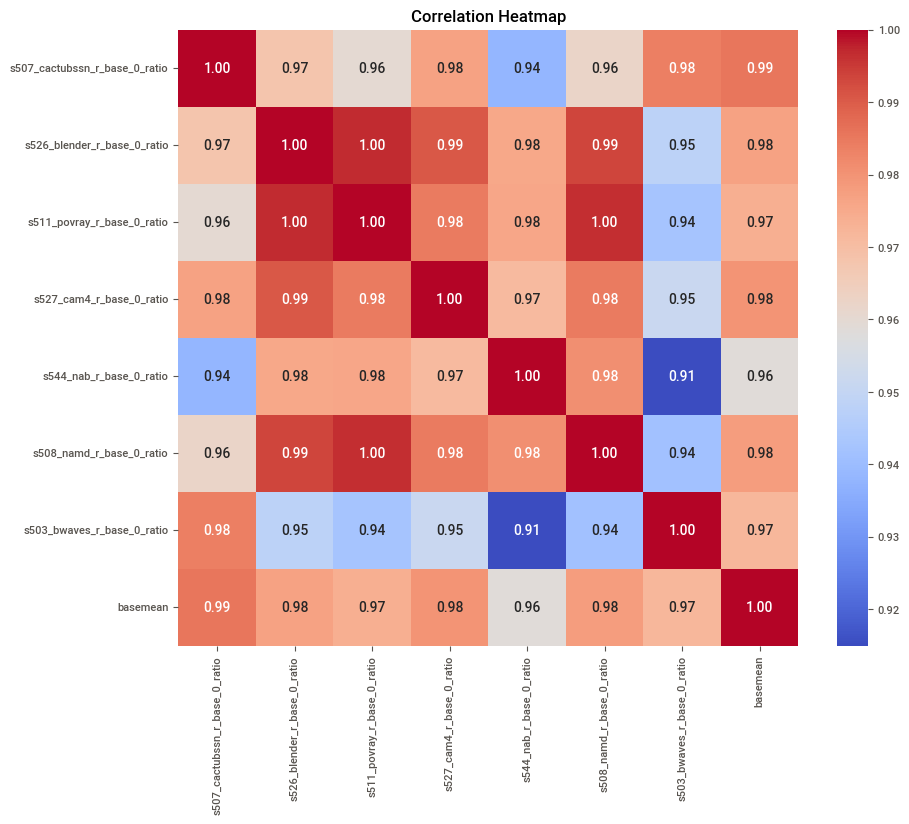

Top Contributing Columns to basemean:
s507_cactubssn_r_base_0_ratio    0.985444
s527_cam4_r_base_0_ratio         0.979794
s508_namd_r_base_0_ratio         0.977761
s526_blender_r_base_0_ratio      0.976906
s511_povray_r_base_0_ratio       0.973923
s503_bwaves_r_base_0_ratio       0.971978
s544_nab_r_base_0_ratio          0.958807
Name: basemean, dtype: float64


In [58]:
# Calculate correlation matrix
correlation_matrix = selected_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

In [59]:
c = highly_correlated.difference(selected_columns)
c

{'dimm_slots_populated',
 'memory_channels_populated',
 'memory_channels_total',
 'numa_nodes_per_socket',
 'os_memory_size_in_kib',
 'packages',
 'peakmean',
 'processor_l1_cache_bytes',
 'processor_l2_cache_bytes',
 's503_bwaves_r_base_0_reported_time',
 's507_cactubssn_r_base_0_reported_time',
 's508_namd_r_base_0_reported_time',
 's510_parest_r_base_0_ratio',
 's510_parest_r_base_0_reported_time',
 's511_povray_r_base_0_reported_time',
 's519_lbm_r_base_0_ratio',
 's519_lbm_r_base_0_reported_time',
 's521_wrf_r_base_0_ratio',
 's521_wrf_r_base_0_reported_time',
 's526_blender_r_base_0_reported_time',
 's527_cam4_r_base_0_reported_time',
 's538_imagick_r_base_0_ratio',
 's538_imagick_r_base_0_reported_time',
 's544_nab_r_base_0_reported_time',
 's549_fotonik3d_r_base_0_ratio',
 's549_fotonik3d_r_base_0_reported_time',
 's554_roms_r_base_0_ratio',
 's554_roms_r_base_0_reported_time',
 'socket0_memory_manufacturers_count',
 'socket0_microcode',
 'socket1_memory_channels_count',
 'sock

In [60]:
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

In [61]:
selected_columns

basemean  s503_bwaves_r_base_0_ratio  s507_cactubssn_r_base_0_ratio  \
16369  1152.125950                 1527.182976                    1494.892032   
16389   620.000830                  832.625088                     773.266176   
16400  1259.401935                 1665.319680                    1545.829632   
16401   620.000830                  832.625088                     773.266176   
16405  1223.415379                 1659.666432                    1584.124416   
...            ...                         ...                            ...   
20561   587.119470                  829.960896                     774.160704   
20562  1165.731580                 1649.916672                    1563.073152   
20565  1110.195804                 1637.516160                    1384.788096   
20605  1193.699177                 1613.296512                    1535.170176   
20606  1170.120670                 1630.558848                    1574.759040   

       s508_namd_r_base_0_ratio  s510_parest_r_base_0_ratio  \
16369               1085.101440                  794.823168   
16389                496.766304                  677.653536   
16400               1027.357824                 1391.006976   
16401                496.766304                  677.653536   
16405               1088.159616                  806.680704   
...                         ...                         ...   
20561                522.146112                  410.133696   
20562                983.273856                  768.376704   
20565               1017.496320                  729.499008   
20605               1087.833600                  763.866624   
20606               1029.175296                  775.835520   

       s511_povray_r_base_0_ratio  s519_lbm_r_base_0_ratio  \
16369                 1603.107840               516.072576   
16389                  671.468160               290.152032   
16400                 1394.076864               580.648128   
16401                  671.468160               290.152032   
16405                 1577.392896               569.134848   
...                           ...                      ...   
20561                  817.334208               204.424320   
20562                 1463.418624               567.305088   
20565                 1563.657984               410.711424   
20605                 1622.790528               545.956992   
20606                 1511.215872               560.164224   

       s521_wrf_r_base_0_ratio  s526_blender_r_base_0_ratio  \
16369               819.510528                  1416.731520   
16389               598.964928                   609.833664   
16400              1203.611904                  1248.742656   
16401               598.964928                   609.833664   
16405               905.074176                  1433.311488   
...                        ...                          ...   
20561               456.794688                   762.180096   
20562               912.939264                  1316.749824   
20565               864.796800                  1348.003968   
20605               889.988352                  1441.735680   
20606               910.877184                  1382.267904   

       s527_cam4_r_base_0_ratio  s538_imagick_r_base_0_ratio  \
16369               1437.990912                  5824.491264   
16389                672.178368                  2463.843840   
16400               1380.223488                  5121.177792   
16401                672.178368                  2463.843840   
16405               1444.698240                  6014.753280   
...                         ...                          ...   
20561                725.395200                  2823.461760   
20562               1350.523392                  5491.033344   
20565               1406.029440                  5331.033216   
20605               1349.678592                  5934.052992   
20606               1369.069824                  5609.844480   

       s5

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
# Assuming 'overall_score' is your target variable
target_variable = 's507_cactubssn_r_base_0_ratio'
c1 = highly_correlated.difference(selected_columns)

# Select the relevant columns
selected_columns =  [target_variable] + list(c1)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_data

s507_cactubssn_r_base_0_ratio  s549_fotonik3d_r_base_0_reported_time  \
16369                    1494.892032                            3042.858374   
16389                     773.266176                            1339.295405   
16400                    1545.829632                            1342.566755   
16401                     773.266176                            1339.295405   
16405                    1584.124416                            2724.809303   
...                              ...                                    ...   
20561                     774.160704                            2713.412636   
20562                    1563.073152                            2718.097886   
20565                    1384.788096                            2721.202765   
20605                    1535.170176                            2765.081606   
20606                    1574.759040                            2732.601376   

       s521_wrf_r_base_0_reported_time  s526_blender_r_base_0_reported_time  \
16369                      1049.601981                           412.803736   
16389                       359.019373                           239.750624   
16400                       357.324504                           234.168352   
16401                       359.019373                           239.750624   
16405                       950.375213                           408.028534   
...                                ...                                  ...   
20561                       941.517120                           383.657345   
20562                       942.187415                           444.148153   
20565                       994.638117                           433.850395   
20605                       966.484767                           405.644433   
20606                       944.320537                           423.096009   

          peakmean  memory_channels_populated  \
16369  1279.392446                       24.0   
16389   620.656459                       24.0   
16400  1260.951329                       24.0   
16401   617.726137                       24.0   
16405  1323.046035                       24.0   
...            ...                        ...   
20561    -1.000000                       12.0   
20562    -1.000000                       24.0   
20565    -1.000000                       24.0   
20605    -1.000000                       24.0   
20606    -1.000000                       24.0   

       s538_imagick_r_base_0_reported_time  packages  \
16369                           163.964187       2.0   
16389                            96.902247       1.0   
16400                            93.241050       2.0   
16401                            96.902247       1.0   
16405                           158.777588       2.0   
...                                    ...       ...   
20561                           169.120048       1.0   
20562                           173.921368       2.0   
20565                           179.141256       2.0   
20605                           160.936887       2.0   
20606                           170.237877       2.0   

       total_memory_size_in_gib  s511_povray_r_base_0_reported_time  ...  \
16369                    1536.0                          559.313601  ...   
16389                    1536.0                          333.835624  ...   
16400                    1536.0                          321.589171  ...   
16401                    1536.0                          333.835624  ...   
16405                    1536.0                          568.431574  ...   
...                         ...                                 ...  ...   
20561                     768.0                          548.514966  ...   
20562                    1536.0                          612.702306  ...   
20565                    1536.0                          573.424654  ...   
20605                    1536.0                          552.529760  ...   
20606      

In [63]:
# Calculate correlation matrix
#selected_data
#selected_data = selected_data.drop(columns=selected_columns)
correlation_matrix = selected_data.corr()
#selected_data
# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# # Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

Top Contributing Columns to s507_cactubssn_r_base_0_ratio:
s549_fotonik3d_r_base_0_reported_time    0.677495
s503_bwaves_r_base_0_reported_time       0.650448
s510_parest_r_base_0_reported_time       0.619561
s554_roms_r_base_0_reported_time         0.615817
s521_wrf_r_base_0_reported_time          0.582480
s507_cactubssn_r_base_0_reported_time    0.523668
s526_blender_r_base_0_reported_time      0.457139
s519_lbm_r_base_0_reported_time          0.426094
s511_povray_r_base_0_reported_time       0.403155
s508_namd_r_base_0_reported_time         0.396906
s527_cam4_r_base_0_reported_time         0.384080
os_memory_size_in_kib                    0.316648
total_memory_size_in_gib                 0.309867
memory_channels_populated                0.309867
dimm_slots_populated                     0.309867
memory_channels_total                    0.301553
packages                                 0.292605
total_physical_cores                     0.291958
s538_imagick_r_base_0_reported_time      

In [64]:
selected_columns1 = df.filter(regex=r'^s5.*ratio$|basemean')

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'important_test_columns' is a list of your identified important test columns
# Assuming 'overall_score' is your target variable
target_variable = 's526_blender_r_base_0_ratio'
c1 = highly_correlated.difference(selected_columns1)

# Select the relevant columns
selected_columns =  [target_variable] + list(c1)
selected_columns
# Create a DataFrame with selected columns
selected_data = data[selected_columns]
selected_data

s526_blender_r_base_0_ratio  s549_fotonik3d_r_base_0_reported_time  \
16369                  1416.731520                            3042.858374   
16389                   609.833664                            1339.295405   
16400                  1248.742656                            1342.566755   
16401                   609.833664                            1339.295405   
16405                  1433.311488                            2724.809303   
...                            ...                                    ...   
20561                   762.180096                            2713.412636   
20562                  1316.749824                            2718.097886   
20565                  1348.003968                            2721.202765   
20605                  1441.735680                            2765.081606   
20606                  1382.267904                            2732.601376   

       s521_wrf_r_base_0_reported_time  s526_blender_r_base_0_reported_time  \
16369                      1049.601981                           412.803736   
16389                       359.019373                           239.750624   
16400                       357.324504                           234.168352   
16401                       359.019373                           239.750624   
16405                       950.375213                           408.028534   
...                                ...                                  ...   
20561                       941.517120                           383.657345   
20562                       942.187415                           444.148153   
20565                       994.638117                           433.850395   
20605                       966.484767                           405.644433   
20606                       944.320537                           423.096009   

          peakmean  memory_channels_populated  \
16369  1279.392446                       24.0   
16389   620.656459                       24.0   
16400  1260.951329                       24.0   
16401   617.726137                       24.0   
16405  1323.046035                       24.0   
...            ...                        ...   
20561    -1.000000                       12.0   
20562    -1.000000                       24.0   
20565    -1.000000                       24.0   
20605    -1.000000                       24.0   
20606    -1.000000                       24.0   

       s538_imagick_r_base_0_reported_time  packages  \
16369                           163.964187       2.0   
16389                            96.902247       1.0   
16400                            93.241050       2.0   
16401                            96.902247       1.0   
16405                           158.777588       2.0   
...                                    ...       ...   
20561                           169.120048       1.0   
20562                           173.921368       2.0   
20565                           179.141256       2.0   
20605                           160.936887       2.0   
20606                           170.237877       2.0   

       total_memory_size_in_gib  s511_povray_r_base_0_reported_time  ...  \
16369                    1536.0                          559.313601  ...   
16389                    1536.0                          333.835624  ...   
16400                    1536.0                          321.589171  ...   
16401                    1536.0                          333.835624  ...   
16405                    1536.0                          568.431574  ...   
...                         ...                                 ...  ...   
20561                     768.0                          548.514966  ...   
20562                    1536.0                          612.702306  ...   
20565                    1536.0                          573.424654  ...   
20605                    1536.0                          552.529760  ...   
20606                    1536.0    

In [66]:
correlation_matrix = selected_data.corr()
#selected_data
# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# # Extract top contributing columns
top_contributing_columns = correlation_matrix[target_variable].abs().sort_values(ascending=False)[1:]

# Display top contributing columns
print(f'Top Contributing Columns to {target_variable}:')
print(top_contributing_columns)

Top Contributing Columns to s526_blender_r_base_0_ratio:
s549_fotonik3d_r_base_0_reported_time    0.780622
s503_bwaves_r_base_0_reported_time       0.754937
s554_roms_r_base_0_reported_time         0.718627
s521_wrf_r_base_0_reported_time          0.693283
s510_parest_r_base_0_reported_time       0.687346
s507_cactubssn_r_base_0_reported_time    0.626308
s519_lbm_r_base_0_reported_time          0.554943
s526_blender_r_base_0_reported_time      0.470455
s527_cam4_r_base_0_reported_time         0.423125
s508_namd_r_base_0_reported_time         0.411305
s511_povray_r_base_0_reported_time       0.409904
s538_imagick_r_base_0_reported_time      0.299130
s544_nab_r_base_0_reported_time          0.270632
packages                                 0.265190
memory_channels_total                    0.252506
total_logical_threads                    0.251650
os_memory_size_in_kib                    0.249938
total_physical_cores                     0.249645
dimm_slots_populated                     0.

In [67]:
selected_data

s526_blender_r_base_0_ratio  s549_fotonik3d_r_base_0_reported_time  \
16369                  1416.731520                            3042.858374   
16389                   609.833664                            1339.295405   
16400                  1248.742656                            1342.566755   
16401                   609.833664                            1339.295405   
16405                  1433.311488                            2724.809303   
...                            ...                                    ...   
20561                   762.180096                            2713.412636   
20562                  1316.749824                            2718.097886   
20565                  1348.003968                            2721.202765   
20605                  1441.735680                            2765.081606   
20606                  1382.267904                            2732.601376   

       s521_wrf_r_base_0_reported_time  s526_blender_r_base_0_reported_time  \
16369                      1049.601981                           412.803736   
16389                       359.019373                           239.750624   
16400                       357.324504                           234.168352   
16401                       359.019373                           239.750624   
16405                       950.375213                           408.028534   
...                                ...                                  ...   
20561                       941.517120                           383.657345   
20562                       942.187415                           444.148153   
20565                       994.638117                           433.850395   
20605                       966.484767                           405.644433   
20606                       944.320537                           423.096009   

          peakmean  memory_channels_populated  \
16369  1279.392446                       24.0   
16389   620.656459                       24.0   
16400  1260.951329                       24.0   
16401   617.726137                       24.0   
16405  1323.046035                       24.0   
...            ...                        ...   
20561    -1.000000                       12.0   
20562    -1.000000                       24.0   
20565    -1.000000                       24.0   
20605    -1.000000                       24.0   
20606    -1.000000                       24.0   

       s538_imagick_r_base_0_reported_time  packages  \
16369                           163.964187       2.0   
16389                            96.902247       1.0   
16400                            93.241050       2.0   
16401                            96.902247       1.0   
16405                           158.777588       2.0   
...                                    ...       ...   
20561                           169.120048       1.0   
20562                           173.921368       2.0   
20565                           179.141256       2.0   
20605                           160.936887       2.0   
20606                           170.237877       2.0   

       total_memory_size_in_gib  s511_povray_r_base_0_reported_time  ...  \
16369                    1536.0                          559.313601  ...   
16389                    1536.0                          333.835624  ...   
16400                    1536.0                          321.589171  ...   
16401                    1536.0                          333.835624  ...   
16405                    1536.0                          568.431574  ...   
...                         ...                                 ...  ...   
20561                     768.0                          548.514966  ...   
20562                    1536.0                          612.702306  ...   
20565                    1536.0                          573.424654  ...   
20605                    1536.0                          552.529760  ...   
20606                    1536.0    

In [68]:
data

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20561  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

In [69]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20561  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

In [70]:
df_cleaned

dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20561                       12.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20561              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20561  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

## Recommendation


In [71]:
cluster_labels_of_interest = [0]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16945              12.0                  12.0                   12.0   
17475              12.0                  12.0                   12.0   
17632              12.0                  12.0                   12.0   
17856              12.0                  12.0                   12.0   
17936              12.0                  12.0                   12.0   
18134              12.0                  12.0                   12.0   
18153              12.0                  12.0                   12.0   
18560              12.0                  12.0                   12.0   
18723              12.0                  12.0                   12.0   
19409              12.0                  12.0                   12.0   
19947              12.0                  12.0                   12.0   
20198              12.0                  12.0                   12.0   
20297              12.0                  12.0                   12.0   
20397              12.0                  12.0                   12.0   
20429              12.0                  12.0                   12.0   
20523              12.0                  12.0                   12.0   
20561              12.0                  12.0                   12.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16945                       12.0                1.0              -1.0   
17475                       12.0                1.0              -1.0   
17632                       12.0                1.0              -1.0   
17856                       12.0                1.0              -1.0   
17936                       12.0                1.0              -1.0   
18134                       12.0                1.0              -1.0   
18153                       12.0                1.0              -1.0   
18560                       12.0                1.0              -1.0   
18723                       12.0                1.0              -1.0   
19409                       12.0                1.0              -1.0   
19947                       12.0                1.0              -1.0   
20198                       12.0                1.0              -1.0   
20297                       12.0                1.0              -1.0   
20397                       12.0                1.0              -1.0   
20429                       12.0                1.0              -1.0   
20523                       12.0                1.0              -1.0   
20561                       12.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16945              -1.0              -1.0              -1.0              -1.0   
17475              -1.0              -1.0              -1.0              -1.0   
17632              -1.0              -1.0              -1.0              -1.0   
17856              -1.0              -1.0              -1.0              -1.0   
17936              -1.0              -1.0              -1.0              -1.0   
18134              -1.0              -1.0              -1.0              -1.0   
18153              -1.0              -1.0              -1.0              -1.0   
18560              -1.0              -1.0              -1.0              -1.0   
18723              -1.0              -1.0              -1.0              -1.0   
19409              -1.0              -1.0              -1.0              -1.0   
19947              -1.0              -1.0              -1.0              -1.0   
20198              -1.0              -1.0              -1.0              -1.0   
20297              -1.0              -1.0              -1.0              -1.0   
20397              -1.0              -1.0              -1.0              -1.0   
20429              -1.0              -1.0              -1.0              -1.0   
20523              -1.0              -1.0              -1.0              -1.0   
20561             

In [72]:
cluster_labels_of_interest = [1]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20544              24.0                  24.0                   24.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0              -1.0   
16389                       24.0                1.0              -1.0   
16400                       24.0                1.0              -1.0   
16401                       24.0                1.0              -1.0   
16405                       24.0                1.0              -1.0   
...                          ...                ...               ...   
20544                       24.0                1.0              -1.0   
20562                       24.0                1.0              -1.0   
20565                       24.0                1.0              -1.0   
20605                       24.0                1.0              -1.0   
20606                       24.0                1.0              -1.0   

       socket0_mclk_mhz  socket0_cclk_mhz  socket0_lclk_mhz  socket0_uclk_mhz  \
16369              -1.0              -1.0              -1.0              -1.0   
16389              -1.0              -1.0              -1.0              -1.0   
16400              -1.0              -1.0              -1.0              -1.0   
16401              -1.0              -1.0              -1.0              -1.0   
16405              -1.0              -1.0              -1.0              -1.0   
...                 ...               ...               ...               ...   
20544              -1.0              -1.0              -1.0              -1.0   
20562              -1.0              -1.0              -1.0              -1.0   
20565              -1.0              -1.0              -1.0              -1.0   
20605              -1.0              -1.0              -1.0              -1.0   
20606              -1.0              -1.0              -1.0              -1.0   

       ...  socket0_dimms_count  socket0_memory_channels_count  \
16369  ...                 12.0                           12.0   
16389  ...                 12.0                           12.0   
16400  ...                 12.0                           12.0   
16401  ...                 12.0                           12.0   
16405  ...                 12.0                           12.0   
...    ...                  ...                            ...   
20544  ...                 12.0                           12.0   
20562  ...                 12.0                           12.0   
20565  ...                 12.0                           12.0   
20605  ...                 12.0                           12.0   
20606  ...                 12.0                           12.0   

       socket0_memory_manufacturers_count  socket0_memory_ranks_count  \
16369                                 1.0                         1.0   
16389                                 1.0                         1.0   
16400                                 1.0                         1.0   
16401                                 1.0                         1.0   
16405                                 1.0                         1.0   
...                                   ...                    

In [73]:
cluster_labels_of_interest = [2]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16521              24.0                  24.0                   24.0   
16544              24.0                  24.0                   24.0   
16705              24.0                  24.0                   24.0   
16874              24.0                  24.0                   24.0   
17047              24.0                  24.0                   24.0   
17085              24.0                  24.0                   24.0   
17097              24.0                  24.0                   24.0   
17188              24.0                  24.0                   24.0   
17393              24.0                  24.0                   24.0   
17407              24.0                  24.0                   24.0   
17412              24.0                  24.0                   24.0   
17510              24.0                  24.0                   24.0   
17756              24.0                  24.0                   24.0   
17876              24.0                  24.0                   24.0   
17916              24.0                  24.0                   24.0   
18167              24.0                  24.0                   24.0   
18188              24.0                  24.0                   24.0   
18253              24.0                  24.0                   24.0   
18315              24.0                  24.0                   24.0   
18351              24.0                  24.0                   24.0   
18493              24.0                  24.0                   24.0   
18512              24.0                  24.0                   24.0   
18520              24.0                  24.0                   24.0   
18576              24.0                  24.0                   24.0   
18580              24.0                  24.0                   24.0   
18755              24.0                  24.0                   24.0   
18802              24.0                  24.0                   24.0   
18808              24.0                  24.0                   24.0   
18810              24.0                  24.0                   24.0   
18859              24.0                  24.0                   24.0   
18875              24.0                  24.0                   24.0   
18963              24.0                  24.0                   24.0   
19035              24.0                  24.0                   24.0   
19310              24.0                  24.0                   24.0   
19455              24.0                  24.0                   24.0   
19486              24.0                  24.0                   24.0   
19504              24.0                  24.0                   24.0   
19507              24.0                  24.0                   24.0   
19525              24.0                  24.0                   24.0   
19640              24.0                  24.0                   24.0   
19789              24.0                  24.0                   24.0   
19856              24.0                  24.0                   24.0   
20124              24.0                  24.0                   24.0   
20233              24.0                  24.0                   24.0   
20287              24.0                  24.0                   24.0   
20288              24.0                  24.0                   24.0   
20316              24.0                  24.0                   24.0   
20460              24.0                  24.0                   24.0   
20516              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16521                       24.0                1.0              -1.0   
16544                       24.0                1.0              -1.0   
16705                       24.0                1.0              -1.0   
16874                       24.0                1.0              -1.0   
17047                       24.0         

In [74]:
cluster_labels_of_interest = [3]  # Replace with the cluster labels you're interested in

# Filter the DataFrame for rows with the specified cluster labels
similar_cluster_data = df_cleaned[df_cleaned['cluster'].isin(cluster_labels_of_interest)]

# Print the filtered DataFrame
similar_cluster_data


Empty DataFrame
Columns: [dimm_slots_total, dimm_slots_populated, memory_channels_total, memory_channels_populated, dimms_per_channel, socket0_fclk_mhz, socket0_mclk_mhz, socket0_cclk_mhz, socket0_lclk_mhz, socket0_uclk_mhz, socket0_ccd000_die_number, ctdp_in_watts, smbios_processor_frequency_in_mhz, numa_zones, packages, processor_family, processor_model, processor_stepping, numa_nodes_per_socket, iterations, basecopies, basemean, peakmean, s503_bwaves_r_base_0_reported_time, s503_bwaves_r_base_0_ratio, s507_cactubssn_r_base_0_reported_time, s507_cactubssn_r_base_0_ratio, s508_namd_r_base_0_reported_time, s508_namd_r_base_0_ratio, s510_parest_r_base_0_reported_time, s510_parest_r_base_0_ratio, s511_povray_r_base_0_reported_time, s511_povray_r_base_0_ratio, s519_lbm_r_base_0_reported_time, s519_lbm_r_base_0_ratio, s521_wrf_r_base_0_reported_time, s521_wrf_r_base_0_ratio, s526_blender_r_base_0_reported_time, s526_blender_r_base_0_ratio, s527_cam4_r_base_0_reported_time, s527_cam4_r_base_0_ratio, s538_imagick_r_base_0_reported_time, s538_imagick_r_base_0_ratio, s544_nab_r_base_0_reported_time, s544_nab_r_base_0_ratio, s549_fotonik3d_r_base_0_reported_time, s549_fotonik3d_r_base_0_ratio, s554_roms_r_base_0_reported_time, s554_roms_r_base_0_ratio, kafka_offset, socket0_processor_physical_cores, socket0_processor_logical_threads, processor_l1_cache_bytes, processor_l2_cache_bytes, processor_l3_cache_bytes, total_physical_cores, total_logical_threads, os_memory_size_in_kib, total_memory_size_in_gib, memory_speed_in_mts, socket0_dimm000_capacity_in_gb, socket0_dimm000_rated_speed_in_mts, socket0_dimm000_rank, socket0_microcode, system_memory_manufacturers_count, system_memory_ranks_count, socket0_dimms_count, socket0_memory_channels_count, socket0_memory_manufacturers_count, socket0_memory_ranks_count, socket1_dimms_count, socket1_memory_channels_count, socket1_memory_manufacturers_count, socket1_memory_ranks_count, cluster, z_score]
Index: []

[0 rows x 76 columns]

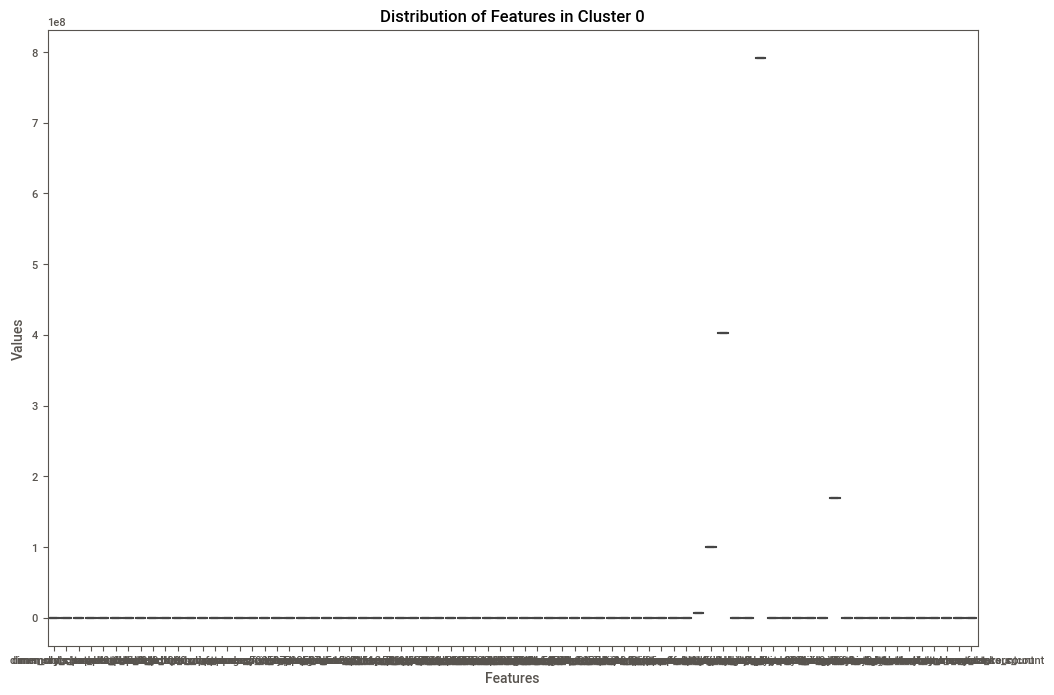

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'cluster' is the column specifying the cluster assignment
cluster_number = 0  # Change this to the desired cluster number

# Extract data for the specified cluster
single_cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_number]

# Plot features within the cluster (assuming numerical features)
plt.figure(figsize=(12, 8))
sns.boxplot(data=single_cluster_data.drop('cluster', axis=1), showfliers=False)
plt.title(f'Distribution of Features in Cluster {cluster_number}')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()


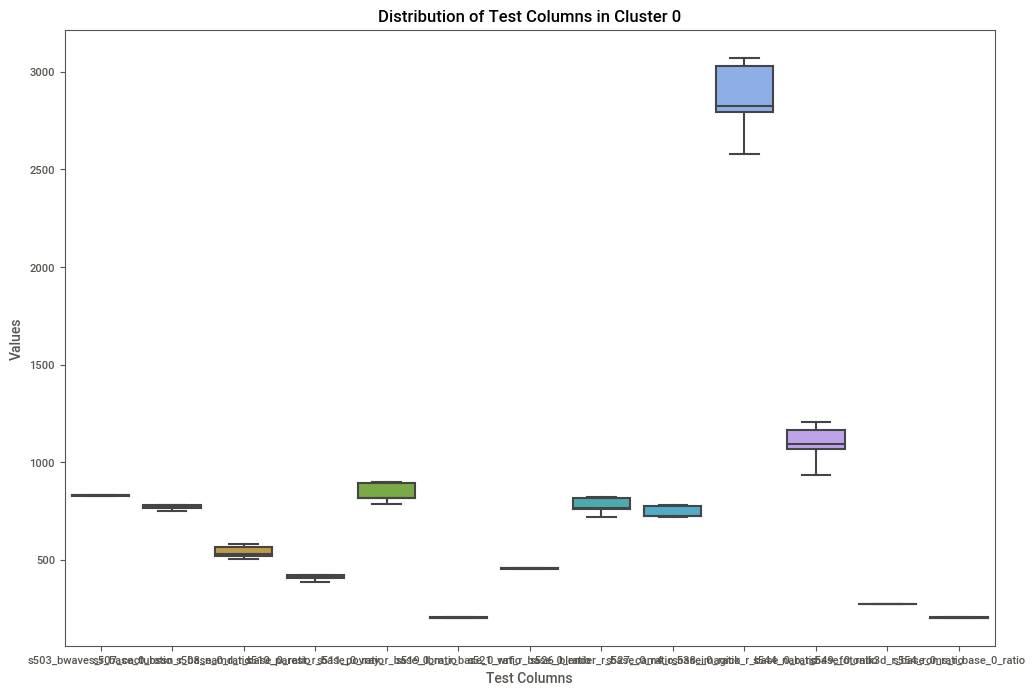

In [76]:
cluster_number = 0  # Change this to the desired cluster number
test_columns = [col for col in df_cleaned.columns if col.startswith('s5') and col.endswith('ratio')]

# Extract data for the specified cluster and only test columns
single_cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_number][test_columns]

# Plot test columns within the cluster
plt.figure(figsize=(12, 8))
sns.boxplot(data=single_cluster_data, showfliers=False)
plt.title(f'Distribution of Test Columns in Cluster {cluster_number}')
plt.xlabel('Test Columns')
plt.ylabel('Values')
plt.show()

In [77]:
single_cluster_data.columns

Index(['s503_bwaves_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio',
       's508_namd_r_base_0_ratio', 's510_parest_r_base_0_ratio',
       's511_povray_r_base_0_ratio', 's519_lbm_r_base_0_ratio',
       's521_wrf_r_base_0_ratio', 's526_blender_r_base_0_ratio',
       's527_cam4_r_base_0_ratio', 's538_imagick_r_base_0_ratio',
       's544_nab_r_base_0_ratio', 's549_fotonik3d_r_base_0_ratio',
       's554_roms_r_base_0_ratio'],
      dtype='object')

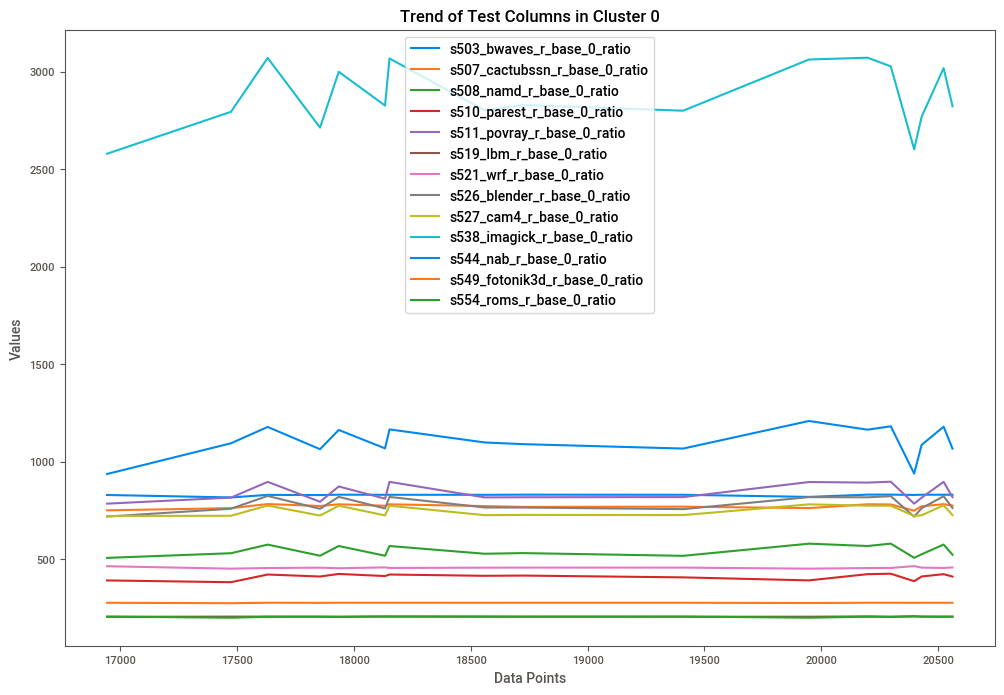

In [78]:
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=single_cluster_data, x=single_cluster_data.index, y=column, label=column)

plt.title(f'Trend of Test Columns in Cluster {cluster_number}')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

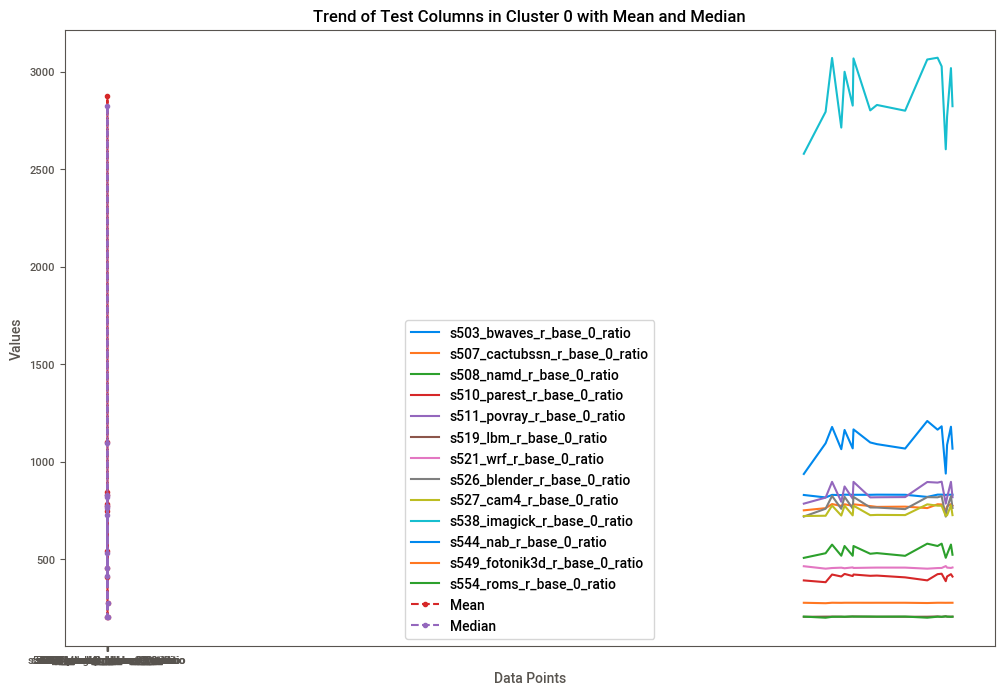

In [79]:
mean_values = single_cluster_data.mean()
median_values = single_cluster_data.median()

# Plot line graphs for mean and median of each test column
plt.figure(figsize=(12, 8))
for column in test_columns:
    sns.lineplot(data=single_cluster_data, x=single_cluster_data.index, y=column, label=column)

# Plot mean and median lines
plt.plot(mean_values, label='Mean', linestyle='--', marker='o')
plt.plot(median_values, label='Median', linestyle='--', marker='o')

plt.title(f'Trend of Test Columns in Cluster {cluster_number} with Mean and Median')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

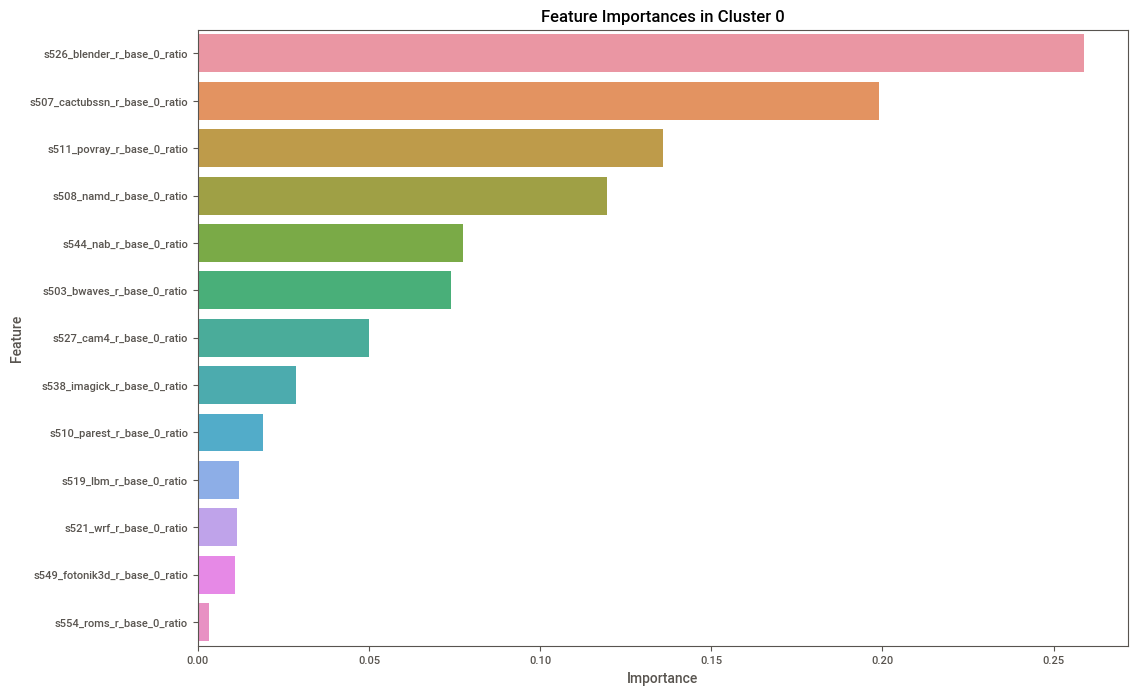

In [80]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'cluster_data' with cluster assignments and features
# Also, 'cluster' column represents the cluster assignments

# Extract data for the specified cluster
cluster_number = 0  # Change this to the desired cluster number
cluster_features = df.filter(regex=r'^s5.*ratio$|basemean')
#cluster_features = [col for col in df_cleaned.columns if col.startswith('s5') and col.endswith('ratio')]
# Assuming RandomForestRegressor for feature importance
# You can replace it with the model you used
cluster_features
rf_model = RandomForestRegressor(random_state=42)
X_train = cluster_features.drop(['basemean'], axis=1)  # Remove the target column
y_train = cluster_features['basemean']

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title(f'Feature Importances in Cluster {cluster_number}')
plt.show()


In [81]:
# Extract the top N important features
top_features = feature_importance_df.head(5)['Feature'].tolist()

# Filter the cluster data to include only the top features
cluster_features_top = cluster_features[top_features]

# Calculate the mean or median values for each of the top features within the cluster
recommended_values = cluster_features_top.mean()  # You can use .median() if you prefer median values

print("Recommended Values:")
print(recommended_values)


Recommended Values:
s526_blender_r_base_0_ratio      1226.865583
s507_cactubssn_r_base_0_ratio    1326.713006
s511_povray_r_base_0_ratio       1371.098049
s508_namd_r_base_0_ratio          927.478676
s544_nab_r_base_0_ratio          1893.004182
dtype: float64


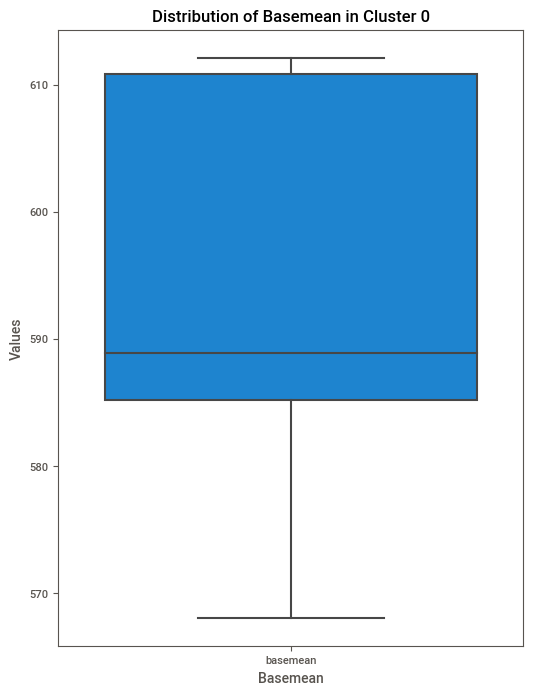

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'cluster' is the column specifying the cluster assignment
cluster_number = 0  # Change this to the desired cluster number

# Extract data for the specified cluster
single_cluster_data = df_cleaned[df_cleaned['cluster'] == cluster_number]

# Extract data for the 'basemean' column within the cluster
single_cluster_basemean = single_cluster_data['basemean'].to_frame()

# Create a box plot for the 'basemean' column within the cluster
plt.figure(figsize=(6, 8))
sns.boxplot(data=single_cluster_basemean, showfliers=False)
plt.title(f'Distribution of Basemean in Cluster {cluster_number}')
plt.xlabel('Basemean')
plt.ylabel('Values')
plt.show()

In [86]:
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
selected_columns

basemean  s503_bwaves_r_base_0_ratio  s507_cactubssn_r_base_0_ratio  \
16369  1152.125950                 1527.182976                    1494.892032   
16389   620.000830                  832.625088                     773.266176   
16400  1259.401935                 1665.319680                    1545.829632   
16401   620.000830                  832.625088                     773.266176   
16405  1223.415379                 1659.666432                    1584.124416   
...            ...                         ...                            ...   
20561   587.119470                  829.960896                     774.160704   
20562  1165.731580                 1649.916672                    1563.073152   
20565  1110.195804                 1637.516160                    1384.788096   
20605  1193.699177                 1613.296512                    1535.170176   
20606  1170.120670                 1630.558848                    1574.759040   

       s508_namd_r_base_0_ratio  s510_parest_r_base_0_ratio  \
16369               1085.101440                  794.823168   
16389                496.766304                  677.653536   
16400               1027.357824                 1391.006976   
16401                496.766304                  677.653536   
16405               1088.159616                  806.680704   
...                         ...                         ...   
20561                522.146112                  410.133696   
20562                983.273856                  768.376704   
20565               1017.496320                  729.499008   
20605               1087.833600                  763.866624   
20606               1029.175296                  775.835520   

       s511_povray_r_base_0_ratio  s519_lbm_r_base_0_ratio  \
16369                 1603.107840               516.072576   
16389                  671.468160               290.152032   
16400                 1394.076864               580.648128   
16401                  671.468160               290.152032   
16405                 1577.392896               569.134848   
...                           ...                      ...   
20561                  817.334208               204.424320   
20562                 1463.418624               567.305088   
20565                 1563.657984               410.711424   
20605                 1622.790528               545.956992   
20606                 1511.215872               560.164224   

       s521_wrf_r_base_0_ratio  s526_blender_r_base_0_ratio  \
16369               819.510528                  1416.731520   
16389               598.964928                   609.833664   
16400              1203.611904                  1248.742656   
16401               598.964928                   609.833664   
16405               905.074176                  1433.311488   
...                        ...                          ...   
20561               456.794688                   762.180096   
20562               912.939264                  1316.749824   
20565               864.796800                  1348.003968   
20605               889.988352                  1441.735680   
20606               910.877184                  1382.267904   

       s527_cam4_r_base_0_ratio  s538_imagick_r_base_0_ratio  \
16369               1437.990912                  5824.491264   
16389                672.178368                  2463.843840   
16400               1380.223488                  5121.177792   
16401                672.178368                  2463.843840   
16405               1444.698240                  6014.753280   
...                         ...                          ...   
20561                725.395200                  2823.461760   
20562               1350.523392                  5491.033344   
20565               1406.029440                  5331.033216   
20605               1349.678592                  5934.052992   
20606               1369.069824                  5609.844480   

       s5

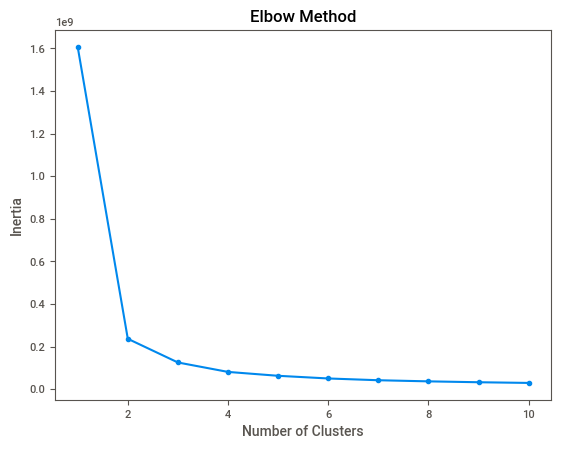

In [87]:
clusters_range = range(1, 11)
inertia_values = []

for n_clusters in clusters_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(selected_columns)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(clusters_range, inertia_values, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

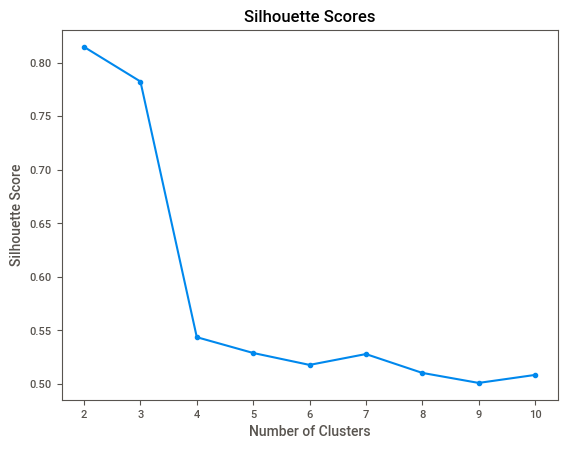

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Variables to store the values for the Silhouette Score
silhouette_scores = []

for n_clusters in clusters_range[1:]:  # starting from 2 clusters
    kmeans = KMeans(n_clusters=n_clusters)
    cluster_labels = kmeans.fit_predict(selected_columns)
    silhouette_avg = silhouette_score(selected_columns, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the Silhouette Scores
plt.plot(clusters_range[1:], silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

In [90]:
optimal_clusters = 4 # Replace this with the optimal number of clusters you've chosen

kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(selected_columns)

# Assign cluster labels to each data point
df['cluster_labels'] = kmeans.labels_

# Print the DataFrame with the cluster labels
print(df)

       dimm_slots_total  dimm_slots_populated  memory_channels_total  \
16369              28.0                  24.0                   24.0   
16389              28.0                  24.0                   24.0   
16400              28.0                  24.0                   24.0   
16401              28.0                  24.0                   24.0   
16405              28.0                  24.0                   24.0   
...                 ...                   ...                    ...   
20561              12.0                  12.0                   12.0   
20562              24.0                  24.0                   24.0   
20565              24.0                  24.0                   24.0   
20605              24.0                  24.0                   24.0   
20606              24.0                  24.0                   24.0   

       memory_channels_populated  dimms_per_channel  socket0_fclk_mhz  \
16369                       24.0                1.0           

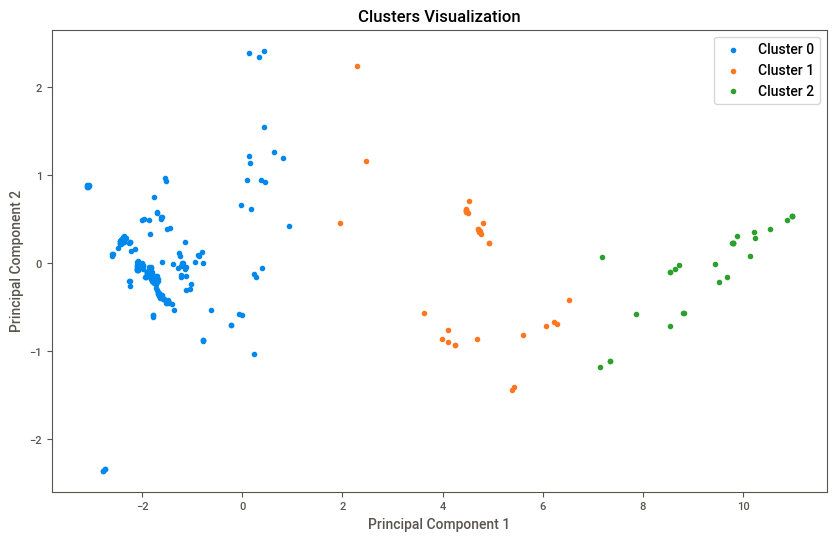

In [92]:
# Assuming `df` is your DataFrame
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

# Standardize the selected columns
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(selected_columns)

# Optimal number of clusters (replace with your choice, based on Elbow or Silhouette method)
optimal_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_columns)
df['cluster_labels'] = kmeans.labels_

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_columns = pca.fit_transform(scaled_columns)

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster_id in range(optimal_clusters):
    plt.scatter(
        pca_columns[df['cluster_labels'] == cluster_id, 0],
        pca_columns[df['cluster_labels'] == cluster_id, 1],
        label=f'Cluster {cluster_id}',
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("Clusters Visualization")
plt.show()

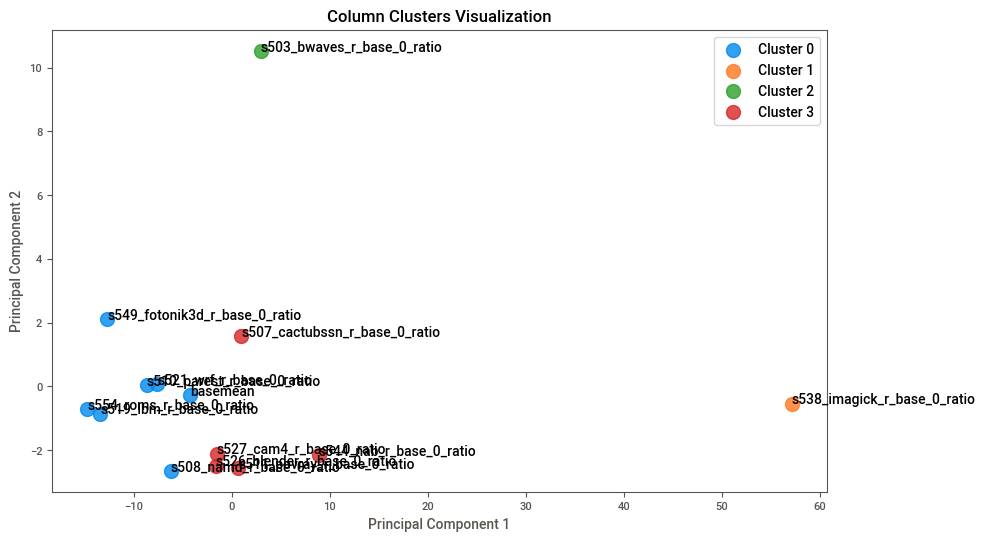

Cluster 0: basemean, s508_namd_r_base_0_ratio, s510_parest_r_base_0_ratio, s519_lbm_r_base_0_ratio, s521_wrf_r_base_0_ratio, s549_fotonik3d_r_base_0_ratio, s554_roms_r_base_0_ratio

Cluster 1: s538_imagick_r_base_0_ratio

Cluster 2: s503_bwaves_r_base_0_ratio

Cluster 3: s507_cactubssn_r_base_0_ratio, s511_povray_r_base_0_ratio, s526_blender_r_base_0_ratio, s527_cam4_r_base_0_ratio, s544_nab_r_base_0_ratio



In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming `df` is your DataFrame
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

# Transpose the DataFrame to work with columns instead of rows
transposed_columns = selected_columns.T

# Standardize the transposed columns
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(transposed_columns)

# Optimal number of clusters (replace with your choice, based on Elbow or Silhouette method)
optimal_clusters = 4

# Apply K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters)
kmeans.fit(scaled_columns)
transposed_columns['cluster_labels'] = kmeans.labels_

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_columns = pca.fit_transform(scaled_columns)

# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster_id in range(optimal_clusters):
    plt.scatter(
        pca_columns[transposed_columns['cluster_labels'] == cluster_id, 0],
        pca_columns[transposed_columns['cluster_labels'] == cluster_id, 1],
        label=f'Cluster {cluster_id}',
        s=100,
        alpha=0.8,
    )

for i, column in enumerate(transposed_columns.index):
    plt.annotate(column, (pca_columns[i, 0], pca_columns[i, 1]))

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.title("Column Clusters Visualization")
plt.show()

# Print the column cluster assignments
for cluster_id in range(optimal_clusters):
    cluster_columns = transposed_columns[transposed_columns['cluster_labels'] == cluster_id].index.tolist()
    print(f'Cluster {cluster_id}: {", ".join(cluster_columns)}\n')